<a href="https://colab.research.google.com/github/Audency/Predictors-of-Low-Birth-Weight-using-Machine-Laerning-/blob/main/Artigo_Machine_Learning_LWB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Machine Learning para Predições em Saúde*

## Análise Descritiva de Dados

#### Audencio Victor

##### Conjunto de Dados Escolhido: Coorte Araraquara Gestantes
##### Objetivo da Análise: predição de Baixo peso ao nascer

##### O Conjunto de dados possui %0 variveis e 1453 observações, com as as seguintes variáveis listadas:

* a_idade: Idade da mãe.
* a_estat1: Possivelmente altura da mãe (início da gravidez).
* b_estat1: Possivelmente altura da mãe (final da gravidez).
* a_pesoat: Peso da mãe (início da gravidez).
* b_pesoat: Peso da mãe (final da gravidez).
* a_pesopre: Peso pré-gravidez da mãe.
* a_rendpcr: Renda per capita da mãe.
* a_civil: Estado civil da mãe.
* a_escola: Nível de escolaridade da mãe.
* a_hb: Nível de hemoglobina da mãe.
* a_hba1c: Nível de Hemoglobina Glicada (HbA1c) da mãe.
* a_hdl: Nível de HDL colesterol da mãe.
* b_ct: Possivelmente outra medida bioquímica ou clínica.
* d_IGUSGrn: Idade gestacional ao nascer (em semanas).
* a_npar: Número de partos anteriores.
* imc: Índice de Massa Corporal (IMC) da mãe.
* categoria: Categoria de peso (Abaixo, Acima, Dentro).
* d_bpn: Indicador de Baixo Peso ao Nascer (BPN).
* gig: Possivelmente Ganho de Peso Gestacional.
* pig: Possivelmente Indicador de Ganho de Peso Insuficiente/Excessivo na Gestação

##### A variável desfecho considerada foi : d_bpn: Indicador de Baixo Peso ao Nascer (BPN).

## Roteiro de Análise
* Instalação de pacotes e Importação de bibliotecas,
* Verificação o conjunto de dados ,
* Separação de Conjuntos de treino e teste,
* Criação dummies para as variáveis categóricas,
* Padronizacao das variveis Continuas,
* Obtenção da performance do modelo,
* Execução dos algoritmos de machine learning,
* Seleção de variáveis com BORUTA,
* Valores de Shapley

Descrição:

A proposta de aprendizado do projeto da disciplina é trabalhar com um problema de classificação, assim o objetivo é construir um modelo de classificação para predição de baixo peso nascença em com base nas caraterísticas maternas e fetais.

Desfecho: É considerado bebe com peso abaixo de 2500g Variáveis preditoras: Sexo do bebe, idade materna, escolaridade materna, número de consultas pré-natais, raça da mae.

In [ ]:
!pip install dfply
!pip install scikit-plot
!pip install graphviz
!pip install dtreeviz
!pip install catboost
!conda install -c conda-forge lightgbm

/bin/bash: line 1: conda: command not found


Importação de bibliotecas

In [ ]:
import pandas as pd # para processamento de bancos de dados
import numpy as np # para processamento numérico de bancos de dados
import matplotlib # para geração de gráficos
import matplotlib.pyplot as plt # configurações adicionais para os gráficos a serem gerados

# informamos ao Python que estamos usando um notebook e que os gráficos devem ser exibidos nele
%matplotlib inline

import seaborn as sns #alternativa para a matplotlib para geração de gráficos

# SCIKIT-LEARN
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from dfply import *  # para importar os comandos da biblioteca dfply

!pip install scikit-plot --upgrade

from dtreeviz.trees import *

import warnings # ignorando os warnings emitidos pelo Python
warnings.filterwarnings("ignore")

# configurações adicionais de figuras
plt.rcParams["figure.figsize"] = [10, 5]
plt.style.use("fivethirtyeight")
%config InlineBackend.figure_format = 'retina'
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
rc('mathtext',**{'default':'regular'})

np.random.seed(42)  # semente de aleatoriedade

In [ ]:
#Chamar o banco de dados
df = pd.read_csv("DadosMLMBA.csv")
df.head().T

0      1       2       3       4
a_idade       36.27  18.83   28.21   26.80   21.67
a_estat1     165.00 163.50  180.00  161.50  152.10
b_estat1     165.20 163.50  181.00  161.50  152.10
a_pesoat      70.20  46.40   61.90   82.00   52.20
b_pesoat      72.80  51.50   65.60   90.40   61.55
a_pesopre     70.20  46.40   61.90   82.00   53.00
a_rendpcr    550.00 825.00  693.33 1200.00  933.33
a_civil           2      1       2       2       1
a_escola      11.00  11.00   11.00   14.00   12.00
a_hb          12.30  13.30   11.70   13.00   11.40
b_hb           9.40  12.40   12.00   13.20   11.20
a_alcool          0      0       0       1       0
b_alcool       0.00   0.00    0.00    0.00    0.00
a_npari        2.00    NaN     NaN     NaN    1.00
a_npcomo       0.80   0.40    0.50    0.25    0.75
a_imcpg       25.78  17.35   19.10   31.43   22.90
a_imcga       25.78  17.35   19.10   31.43   22.56
b_imcga       26.67  19.26   20.02   34.65   26.62
a_fmp         33.90  21.20   20.70   36.20   22.10
b_fmp         32.30  25.50   23.80   40.50   28.20
a_cor             1      1       2       1       5
a_vigord          0      0       0       0       0
b_vigord       0.00   1.00    0.00    0.00    0.00
a_moderd          7      7       5       0       0
b_moderd       2.00   3.00    5.00    0.00    2.00
b_fumog        1.00   0.00    0.00    0.00    0.00
a_fumog           1      0       0       0       0
b_hba1c        5.10   4.90    4.40    5.00    4.40
b_hdl         47.00  56.00   62.00   53.00   68.00
a_ldl        123.00  67.00   50.00  120.00   96.00
a_ct         185.00 121.00  107.00  197.00  161.00
a_pcr          3.00   0.40   13.30   10.90    4.60
b_pcr          5.30   2.60    3.30    8.20    2.70
a_circbracm   30.50  22.25   23.65   36.00   29.00
b_circbracm   30.50  22.00   24.00   35.50   29.00
a_igadums     11.00  13.00   14.00   14.00   14.00
a_agdm            0      0       0       0       0
b_agdm         0.00   0.00    0.00    0.00    0.00
a_aghas           0      0       0       0       0
b_aghas        0.00   0.00    0.00    0.00    0.00
a_hba1c        5.40   4.60    4.80    4.90    4.80
a_hdl         38.00  42.00   46.00   51.00   55.00
b_ct         198.00 219.00  161.00  225.00  236.00
d_IGUSGrn    270.00 268.00  284.00  256.00  276.00
a_npar          NaN    NaN     NaN     NaN     NaN
imc           25.79  17.36   19.10   31.44   22.91
categoria    Abaixo  Acima  Abaixo   Acima  Dentro
d_bpn             0      0       0       0       0
gig               0      0       0       0       0
pig               0      0       1       0       0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.columns  # para ver os nomes das  variveis

Index(['a_idade', 'a_estat1', 'b_estat1', 'a_pesoat', 'b_pesoat', 'a_pesopre',
       'a_rendpcr', 'a_civil', 'a_escola', 'a_hb', 'b_hb', 'a_alcool',
       'b_alcool', 'a_npari', 'a_npcomo', 'a_imcpg', 'a_imcga', 'b_imcga',
       'a_fmp', 'b_fmp', 'a_cor', 'a_vigord', 'b_vigord', 'a_moderd',
       'b_moderd', 'b_fumog', 'a_fumog', 'b_hba1c', 'b_hdl', 'a_ldl', 'a_ct',
       'a_pcr', 'b_pcr', 'a_circbracm', 'b_circbracm', 'a_igadums', 'a_agdm',
       'b_agdm', 'a_aghas', 'b_aghas', 'a_hba1c', 'a_hdl', 'b_ct', 'd_IGUSGrn',
       'a_npar', 'imc', 'categoria', 'd_bpn', 'gig', 'pig'],
      dtype='object')

In [ ]:
# Columns
print('List of variables:')
print(list (df.columns.values))

List of variables:
['a_idade', 'a_estat1', 'b_estat1', 'a_pesoat', 'b_pesoat', 'a_pesopre', 'a_rendpcr', 'a_civil', 'a_escola', 'a_hb', 'b_hb', 'a_alcool', 'b_alcool', 'a_npari', 'a_npcomo', 'a_imcpg', 'a_imcga', 'b_imcga', 'a_fmp', 'b_fmp', 'a_cor', 'a_vigord', 'b_vigord', 'a_moderd', 'b_moderd', 'b_fumog', 'a_fumog', 'b_hba1c', 'b_hdl', 'a_ldl', 'a_ct', 'a_pcr', 'b_pcr', 'a_circbracm', 'b_circbracm', 'a_igadums', 'a_agdm', 'b_agdm', 'a_aghas', 'b_aghas', 'a_hba1c', 'a_hdl', 'b_ct', 'd_IGUSGrn', 'a_npar', 'imc', 'categoria', 'd_bpn', 'gig', 'pig']


In [ ]:
df.isna()
df.isna().sum()

a_idade           0
a_estat1          0
b_estat1        106
a_pesoat          0
b_pesoat        110
a_pesopre         0
a_rendpcr        11
a_civil           0
a_escola          1
a_hb            232
b_hb            274
a_alcool          0
b_alcool        109
a_npari         573
a_npcomo          0
a_imcpg           0
a_imcga           0
b_imcga         112
a_fmp            30
b_fmp           124
a_cor             0
a_vigord          0
b_vigord        111
a_moderd          0
b_moderd        111
b_fumog         109
a_fumog           0
b_hba1c         275
b_hdl           274
a_ldl           231
a_ct            231
a_pcr           231
b_pcr           275
a_circbracm      28
b_circbracm     123
a_igadums         2
a_agdm            0
b_agdm          111
a_aghas           0
b_aghas         111
a_hba1c         236
a_hdl           231
b_ct            274
d_IGUSGrn         5
a_npar         1433
imc               0
categoria         0
d_bpn             0
gig               0
pig               0
dtype: int64

In [ ]:
# Fazer imputacao dos missings
for col in df.select_dtypes(include=['number']):
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
def transform_to_binary(value):
    # Se o valor for igual a 1, retornamos 1, caso contrário, retornamos 0
    return 1 if value == 1 else 0

columns_to_transform = ['b_alcool', 'b_vigord', 'b_moderd', 'b_fumog', 'b_agdm', 'b_aghas']

for column in columns_to_transform:
    df[column] = df[column].apply(transform_to_binary)

In [ ]:
# Para as variáveis categóricas iremos criar dummies/ One hotencode
df= pd.get_dummies(df, columns=['a_civil', 'a_cor','a_alcool','b_alcool','a_vigord', 'b_vigord', 'a_moderd', 'b_moderd',
                                'b_fumog', 'a_fumog', 'a_agdm','b_agdm', 'a_aghas', 'b_aghas'])

In [ ]:
df.drop(['imc','a_npar', 'a_npari','b_pesoat','categoria','gig', 'pig'], axis=1, inplace=True)

In [ ]:
# defenindo a variavel desfecho
target = df['d_bpn']  #target variable to predict
df = df.select_dtypes(exclude=[object])

In [ ]:
target

0       0
1       0
2       0
3       0
4       0
       ..
1430    0
1431    0
1432    0
1433    0
1434    0
Name: d_bpn, Length: 1435, dtype: int64

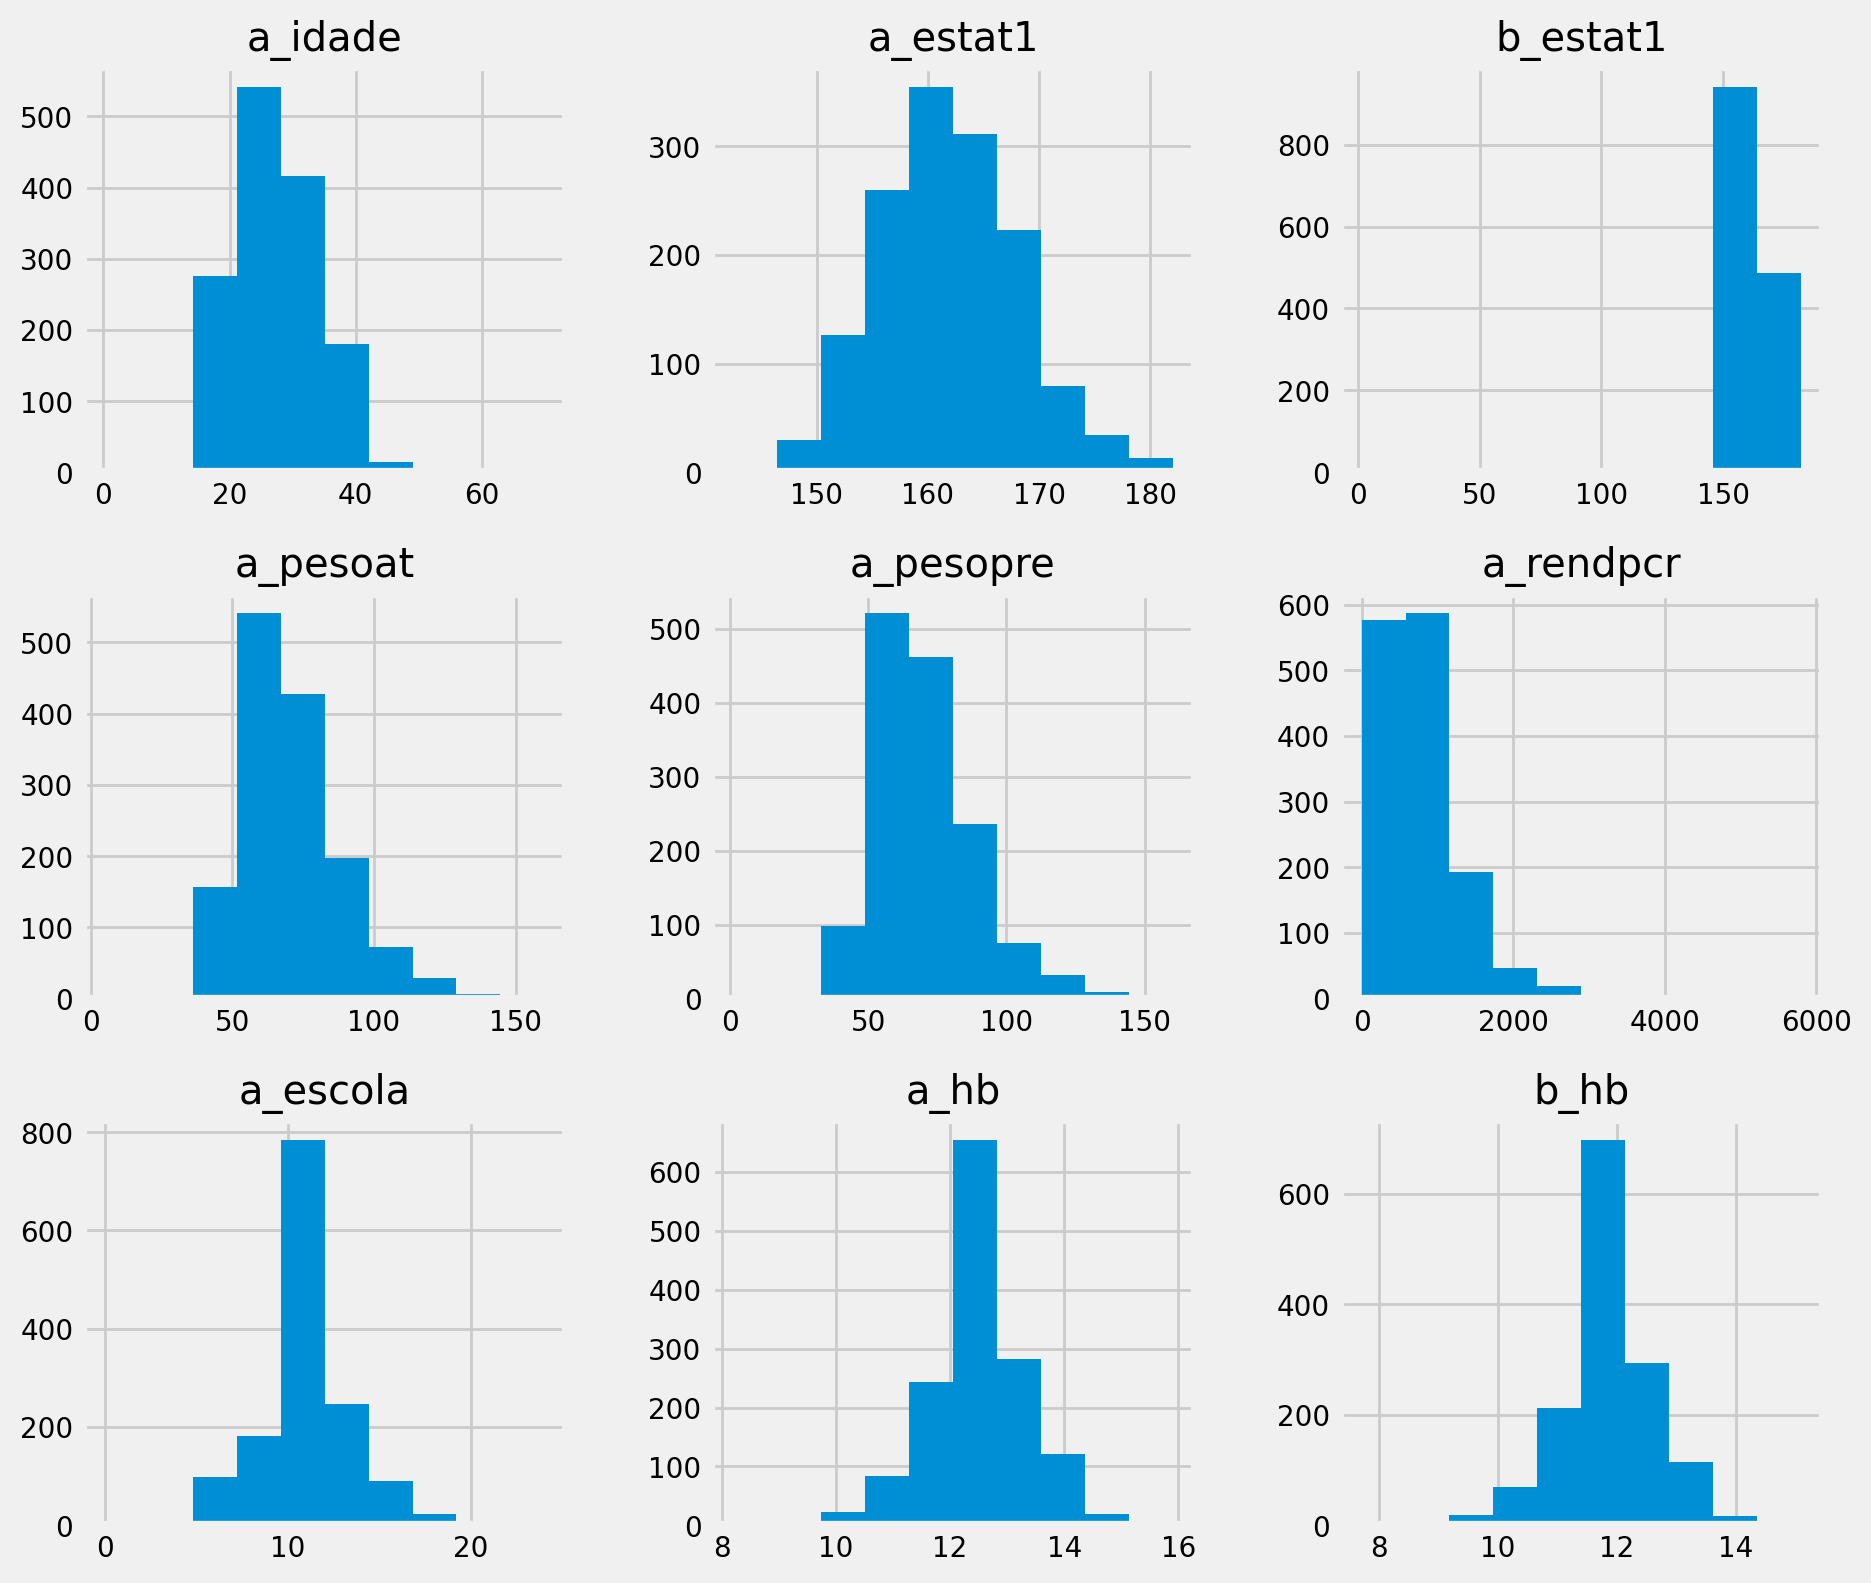

In [ ]:
# construcao de graficos de variaves quantitativas
df_reduced= df[list(df.columns)[0:9]]
df_reduced.hist(figsize=[10,9]);

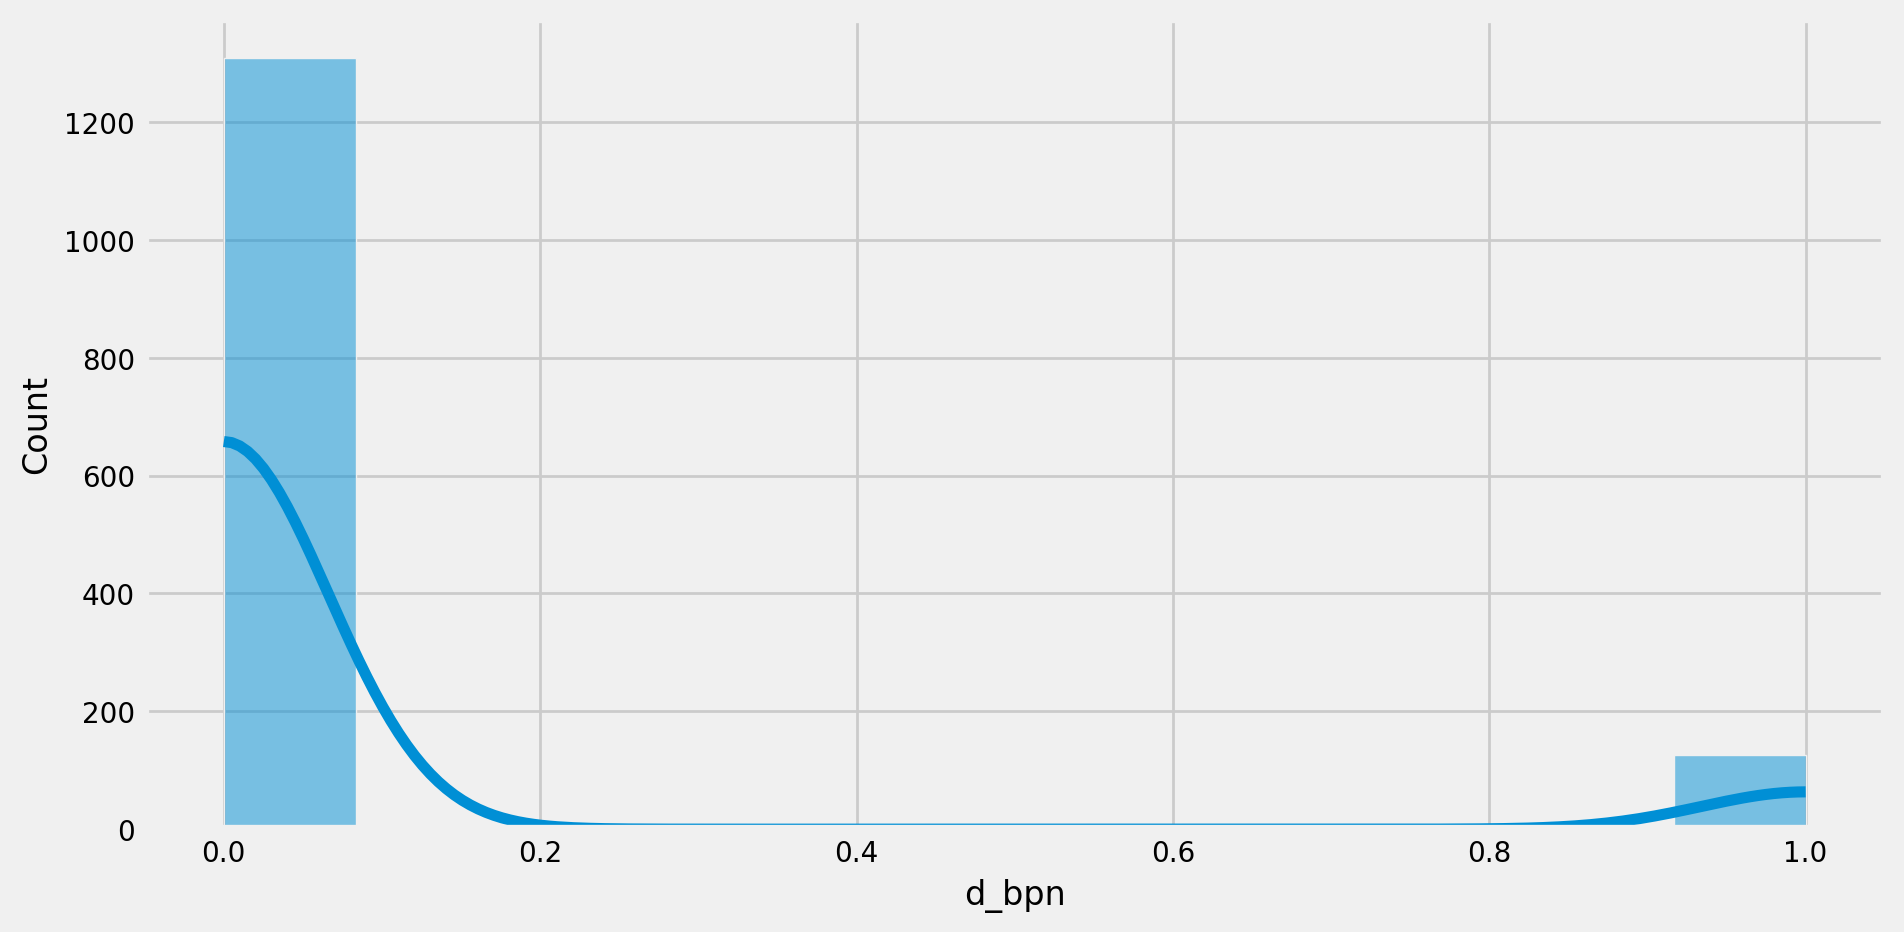

In [ ]:
#Plot histogram of target
import seaborn as sns
sns.histplot(df['d_bpn'], kde=True)
plt.show()

In [ ]:
import pandas as pd

# Supondo que "df" seja o nome do seu DataFrame
correlation_matrix = df.corr()

print(correlation_matrix)


           a_idade  a_estat1  b_estat1  a_pesoat  a_pesopre  a_rendpcr  \
a_idade       1.00      0.03      0.05      0.27       0.25       0.12   
a_estat1      0.03      1.00      0.56      0.34       0.33       0.05   
b_estat1      0.05      0.56      1.00      0.20       0.20       0.01   
a_pesoat      0.27      0.34      0.20      1.00       0.97       0.03   
a_pesopre     0.25      0.33      0.20      0.97       1.00       0.02   
...            ...       ...       ...       ...        ...        ...   
b_agdm_1      0.11      0.03      0.03      0.16       0.16      -0.04   
a_aghas_0    -0.17     -0.02     -0.02     -0.29      -0.28       0.05   
a_aghas_1     0.17      0.02      0.02      0.29       0.28      -0.05   
b_aghas_0    -0.15     -0.00     -0.01     -0.29      -0.27       0.03   
b_aghas_1     0.15      0.00      0.01      0.29       0.27      -0.03   

           a_escola  a_hb  b_hb  a_npcomo  ...  a_fumog_0  a_fumog_1  \
a_idade        0.14  0.08  0.08     -0.

In [ ]:
variaveis_preditoras = df.iloc[:, df.columns != 'd_bpn']
classe = df.iloc[:, df.columns == 'd_bpn']
X_train, X_test, y_train, y_test = train_test_split(variaveis_preditoras,
                                                    classe,
                                                    train_size = 0.80,
                                                    random_state = 45)

In [ ]:
X_train.shape

(1148, 73)

In [ ]:
X_test.shape

(287, 73)

In [ ]:
 X_test.columns

Index(['a_idade', 'a_estat1', 'b_estat1', 'a_pesoat', 'a_pesopre', 'a_rendpcr',
       'a_escola', 'a_hb', 'b_hb', 'a_npcomo', 'a_imcpg', 'a_imcga', 'b_imcga',
       'a_fmp', 'b_fmp', 'b_hba1c', 'b_hdl', 'a_ldl', 'a_ct', 'a_pcr', 'b_pcr',
       'a_circbracm', 'b_circbracm', 'a_igadums', 'a_hba1c', 'a_hdl', 'b_ct',
       'd_IGUSGrn', 'a_civil_1', 'a_civil_2', 'a_civil_3', 'a_civil_4',
       'a_cor_1', 'a_cor_2', 'a_cor_3', 'a_cor_4', 'a_cor_5', 'a_alcool_0',
       'a_alcool_1', 'b_alcool_0', 'b_alcool_1', 'a_vigord_0', 'a_vigord_1',
       'a_vigord_2', 'a_vigord_3', 'a_vigord_4', 'a_vigord_5', 'a_vigord_6',
       'a_vigord_7', 'b_vigord_0', 'b_vigord_1', 'a_moderd_0', 'a_moderd_1',
       'a_moderd_2', 'a_moderd_3', 'a_moderd_4', 'a_moderd_5', 'a_moderd_6',
       'a_moderd_7', 'b_moderd_0', 'b_moderd_1', 'b_fumog_0', 'b_fumog_1',
       'a_fumog_0', 'a_fumog_1', 'a_agdm_0', 'a_agdm_1', 'b_agdm_0',
       'b_agdm_1', 'a_aghas_0', 'a_aghas_1', 'b_aghas_0', 'b_aghas_1'],
      dtyp

In [ ]:
X_train.columns

Index(['a_idade', 'a_estat1', 'b_estat1', 'a_pesoat', 'a_pesopre', 'a_rendpcr',
       'a_escola', 'a_hb', 'b_hb', 'a_npcomo', 'a_imcpg', 'a_imcga', 'b_imcga',
       'a_fmp', 'b_fmp', 'b_hba1c', 'b_hdl', 'a_ldl', 'a_ct', 'a_pcr', 'b_pcr',
       'a_circbracm', 'b_circbracm', 'a_igadums', 'a_hba1c', 'a_hdl', 'b_ct',
       'd_IGUSGrn', 'a_civil_1', 'a_civil_2', 'a_civil_3', 'a_civil_4',
       'a_cor_1', 'a_cor_2', 'a_cor_3', 'a_cor_4', 'a_cor_5', 'a_alcool_0',
       'a_alcool_1', 'b_alcool_0', 'b_alcool_1', 'a_vigord_0', 'a_vigord_1',
       'a_vigord_2', 'a_vigord_3', 'a_vigord_4', 'a_vigord_5', 'a_vigord_6',
       'a_vigord_7', 'b_vigord_0', 'b_vigord_1', 'a_moderd_0', 'a_moderd_1',
       'a_moderd_2', 'a_moderd_3', 'a_moderd_4', 'a_moderd_5', 'a_moderd_6',
       'a_moderd_7', 'b_moderd_0', 'b_moderd_1', 'b_fumog_0', 'b_fumog_1',
       'a_fumog_0', 'a_fumog_1', 'a_agdm_0', 'a_agdm_1', 'b_agdm_0',
       'b_agdm_1', 'a_aghas_0', 'a_aghas_1', 'b_aghas_0', 'b_aghas_1'],
      dtyp

In [ ]:
# Standarscaler com passthrough tem um problema de ordenação das colunas. Quando aplicamos, ele fornce o resultado com as colunas padronizadas em primeiro, seguidas das demais colunas.
# Para resolver este problema, iremos ordenar as nossas colunas alocando as contínuas nas primeiras posições

X_train = X_train.loc[:,['a_idade', 'a_estat1', 'b_estat1', 'a_pesoat', 'a_pesopre', 'a_rendpcr',
       'a_escola', 'a_hb', 'b_hb', 'a_npcomo', 'a_imcpg', 'a_imcga', 'b_imcga',
       'a_fmp', 'b_fmp', 'b_hba1c', 'b_hdl', 'a_ldl', 'a_ct', 'a_pcr', 'b_pcr',
       'a_circbracm', 'b_circbracm', 'a_igadums', 'a_hba1c', 'a_hdl', 'b_ct',
       'a_civil_1', 'a_civil_2', 'a_civil_3', 'a_civil_4', 'a_cor_1',
       'a_cor_2', 'a_cor_3', 'a_cor_4', 'a_cor_5', 'a_alcool_0', 'a_alcool_1',
       'b_alcool_0', 'b_alcool_1', 'a_vigord_0', 'a_vigord_1', 'a_vigord_2',
       'a_vigord_3', 'a_vigord_4', 'a_vigord_5', 'a_vigord_6', 'a_vigord_7',
       'b_vigord_0', 'b_vigord_1', 'a_moderd_0', 'a_moderd_1', 'a_moderd_2',
       'a_moderd_3', 'a_moderd_4', 'a_moderd_5', 'a_moderd_6', 'a_moderd_7',
       'b_moderd_0', 'b_moderd_1', 'b_fumog_0', 'b_fumog_1', 'a_fumog_0',
       'a_fumog_1', 'a_agdm_0', 'a_agdm_1', 'b_agdm_0', 'b_agdm_1',
       'a_aghas_0', 'a_aghas_1', 'b_aghas_0', 'b_aghas_1']]

X_test = X_test.loc[:,['a_idade', 'a_estat1', 'b_estat1', 'a_pesoat', 'a_pesopre', 'a_rendpcr',
       'a_escola', 'a_hb', 'b_hb', 'a_npcomo', 'a_imcpg', 'a_imcga', 'b_imcga',
       'a_fmp', 'b_fmp', 'b_hba1c', 'b_hdl', 'a_ldl', 'a_ct', 'a_pcr', 'b_pcr',
       'a_circbracm', 'b_circbracm', 'a_igadums', 'a_hba1c', 'a_hdl', 'b_ct',
       'a_civil_1', 'a_civil_2', 'a_civil_3', 'a_civil_4', 'a_cor_1',
       'a_cor_2', 'a_cor_3', 'a_cor_4', 'a_cor_5', 'a_alcool_0', 'a_alcool_1',
       'b_alcool_0', 'b_alcool_1', 'a_vigord_0', 'a_vigord_1', 'a_vigord_2',
       'a_vigord_3', 'a_vigord_4', 'a_vigord_5', 'a_vigord_6', 'a_vigord_7',
       'b_vigord_0', 'b_vigord_1', 'a_moderd_0', 'a_moderd_1', 'a_moderd_2',
       'a_moderd_3', 'a_moderd_4', 'a_moderd_5', 'a_moderd_6', 'a_moderd_7',
       'b_moderd_0', 'b_moderd_1', 'b_fumog_0', 'b_fumog_1', 'a_fumog_0',
       'a_fumog_1', 'a_agdm_0', 'a_agdm_1', 'b_agdm_0', 'b_agdm_1',
       'a_aghas_0', 'a_aghas_1', 'b_aghas_0', 'b_aghas_1']]

X_train_columns = X_train.columns
X_test_columns = X_test.columns

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler # make sure to import the StandardScaler

### variáveis contínuas que serão padronizadas
continuous_cols = ['a_idade', 'a_estat1', 'b_estat1', 'a_pesoat', 'a_pesopre','a_rendpcr', # removed b_pesoat
       'a_escola', 'a_hb', 'b_hb', 'a_npcomo','a_imcpg', 'a_imcga', 'b_imcga', 'a_fmp', 'b_fmp',
       'b_hba1c', 'b_hdl','a_ldl', 'a_ct', 'a_pcr', 'b_pcr', 'a_circbracm', 'b_circbracm',
       'a_igadums', 'a_hba1c', 'a_hdl', 'b_ct']

def setScaler():
  ct = ColumnTransformer([
        ('scaler', StandardScaler(), continuous_cols)
    ], remainder='passthrough' # utilizamos para manter as colunas em que não aplicamos o scaler
  )
  return ct

scaler = setScaler()

In [ ]:
scaler.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', StandardScaler(),
                                 ['a_idade', 'a_estat1', 'b_estat1', 'a_pesoat',
                                  'a_pesopre', 'a_rendpcr', 'a_escola', 'a_hb',
                                  'b_hb', 'a_npcomo', 'a_imcpg', 'a_imcga',
                                  'b_imcga', 'a_fmp', 'b_fmp', 'b_hba1c',
                                  'b_hdl', 'a_ldl', 'a_ct', 'a_pcr', 'b_pcr',
                                  'a_circbracm', 'b_circbracm', 'a_igadums',
                                  'a_hba1c', 'a_hdl', 'b_ct'])])

In [ ]:
X_train = scaler.transform(X_train)

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
X_train = pd.DataFrame(X_train, columns=X_train_columns)
X_test = pd.DataFrame(X_test, columns=X_test_columns)

In [ ]:
X_train.head()

In [ ]:
# transformando Y --> 1 e N --> 0
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

Modelos Prontos e tunados

In [ ]:
### XGBoost
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import numpy as np

# Oversampling with SMOTE
smote = SMOTE(random_state=42)

# Função para construir o pipeline
def build_model_with_smote(model):
    return Pipeline([
        ('smote', smote),
        ('model', model)
    ])

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(variaveis_preditoras, classe, train_size=0.80, random_state=45)

# Parâmetros para XGBoost
param_grid_xgb = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.3],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = XGBClassifier(random_state=45, use_label_encoder=False, eval_metric='logloss')

# Pipeline com SMOTE e XGBoost
pipeline_xgb = build_model_with_smote(xgb_model)

# RandomizedSearchCV para tunagem de hiperparâmetros com SMOTE
random_search_xgb = RandomizedSearchCV(
    pipeline_xgb,
    param_grid_xgb,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# Treinamento do modelo
random_search_xgb.fit(X_train, y_train)

# Exibindo os melhores parâmetros
print("Melhores parâmetros XGBoost:", random_search_xgb.best_params_)

# Predição e avaliação
y_pred_xgb = random_search_xgb.predict(X_test)

# Métricas de avaliação
print("Acurácia:", accuracy_score(y_test, y_pred_xgb))
print("Precisão:", precision_score(y_test, y_pred_xgb, average='macro'))
print("Recall:", recall_score(y_test, y_pred_xgb, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred_xgb, average='macro'))
print("AUC:", roc_auc_score(y_test, random_search_xgb.predict_proba(X_test)[:, 1]))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


Melhores parâmetros XGBoost: {'model__subsample': 1.0, 'model__n_estimators': 500, 'model__max_depth': 3, 'model__learning_rate': 0.01, 'model__colsample_bytree': 1.0}
Acurácia: 0.9198606271777003
Precisão: 0.7644787644787645
Recall: 0.7732193732193733
F1-Score: 0.7687510947626555
AUC: 0.9401709401709402
Matriz de Confusão:
 [[248  12]
 [ 11  16]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       260
           1       0.57      0.59      0.58        27

    accuracy                           0.92       287
   macro avg       0.76      0.77      0.77       287
weighted avg       0.92      0.92      0.92       287



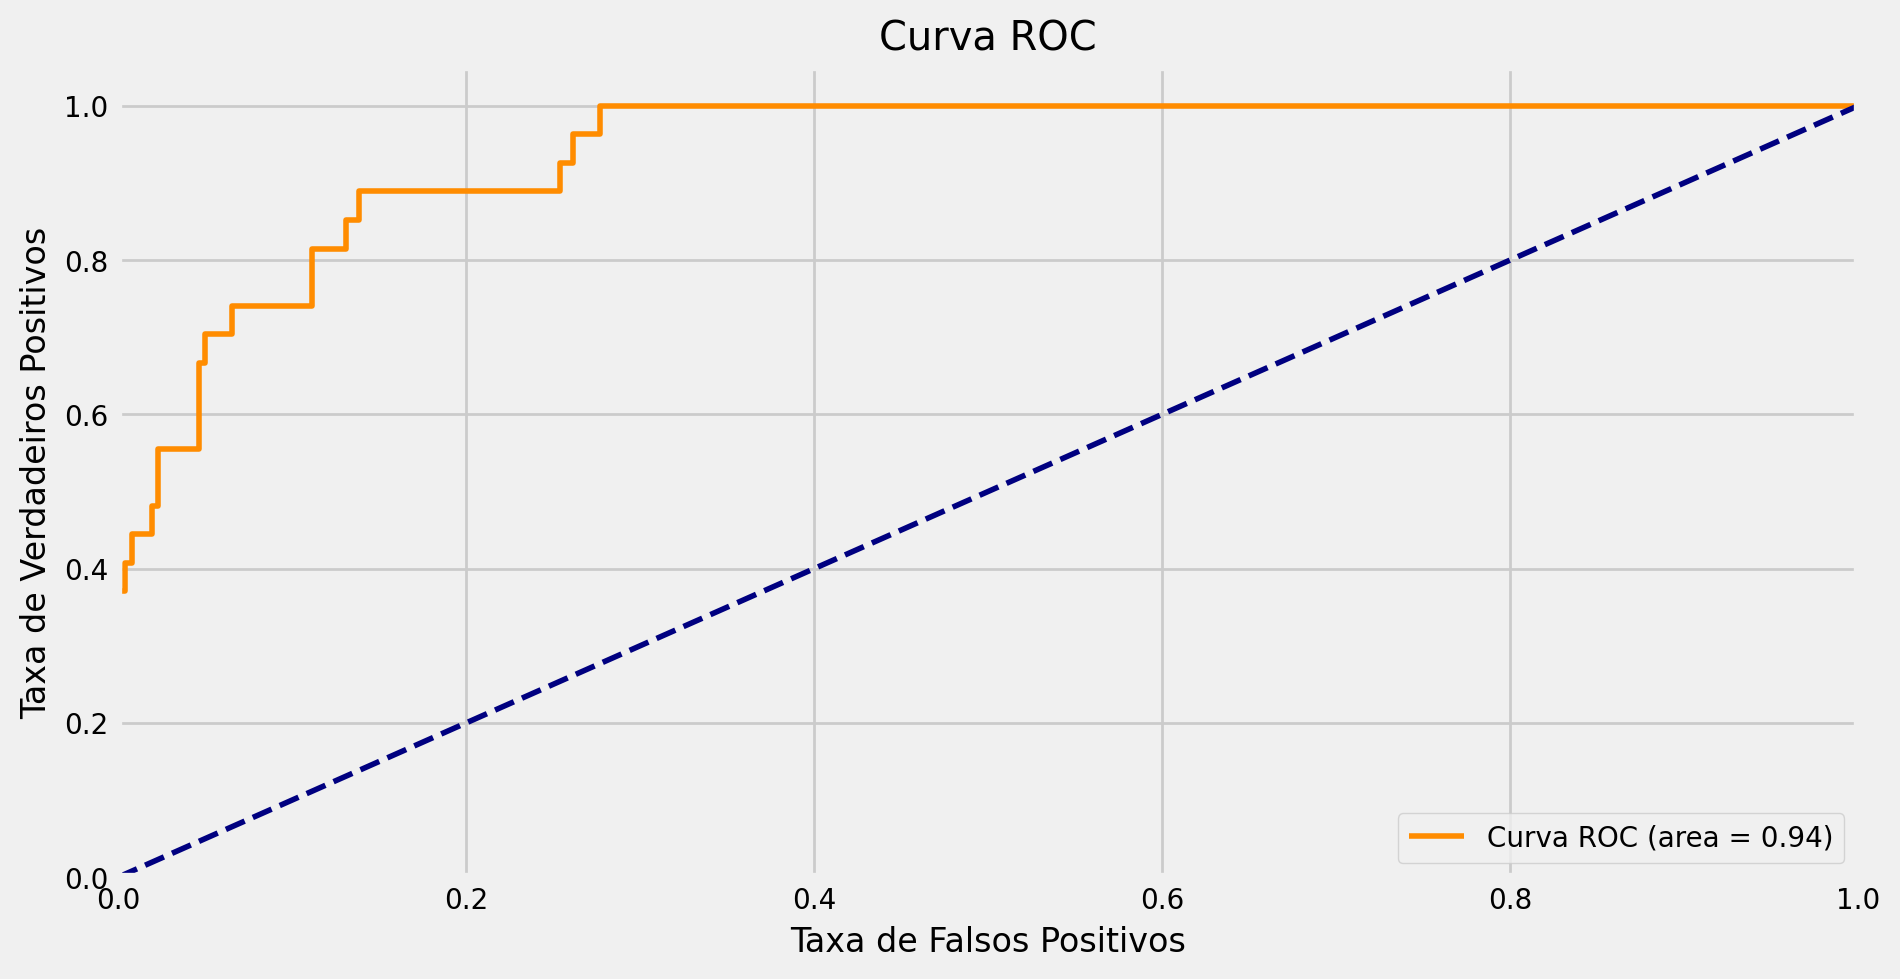

In [ ]:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predição das probabilidades para a classe positiva
y_pred_proba = random_search_xgb.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular a AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


In [ ]:
## Modelo LightBGM

from lightgbm import LGBMClassifier

# Parâmetros para LightGBM
param_grid_lgb = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [5, 10, 15],
    'model__learning_rate': [0.01, 0.1, 0.3],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

# Inicialização do modelo LightGBM
lgb_model = LGBMClassifier(random_state=45)

# Pipeline com SMOTE e LightGBM
pipeline_lgb = build_model_with_smote(lgb_model)

# RandomizedSearchCV para LightGBM
random_search_lgb = RandomizedSearchCV(
    pipeline_lgb,
    param_grid_lgb,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# Treinamento do modelo
random_search_lgb.fit(X_train, y_train)

# Exibindo os melhores parâmetros
print("Melhores parâmetros LightGBM:", random_search_lgb.best_params_)

# Predição e avaliação
y_pred_lgb = random_search_lgb.predict(X_test)

# Métricas de avaliação
print("Acurácia LightGBM:", accuracy_score(y_test, y_pred_lgb))
print("Precisão LightGBM:", precision_score(y_test, y_pred_lgb, average='macro'))
print("Recall LightGBM:", recall_score(y_test, y_pred_lgb, average='macro'))
print("F1-Score LightGBM:", f1_score(y_test, y_pred_lgb, average='macro'))
print("AUC LightGBM:", roc_auc_score(y_test, random_search_lgb.predict_proba(X_test)[:, 1]))
print("Matriz de Confusão LightGBM:\n", confusion_matrix(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 1049, number of negative: 1049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7220
[LightGBM] [Info] Number of data points in the train set: 2098, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

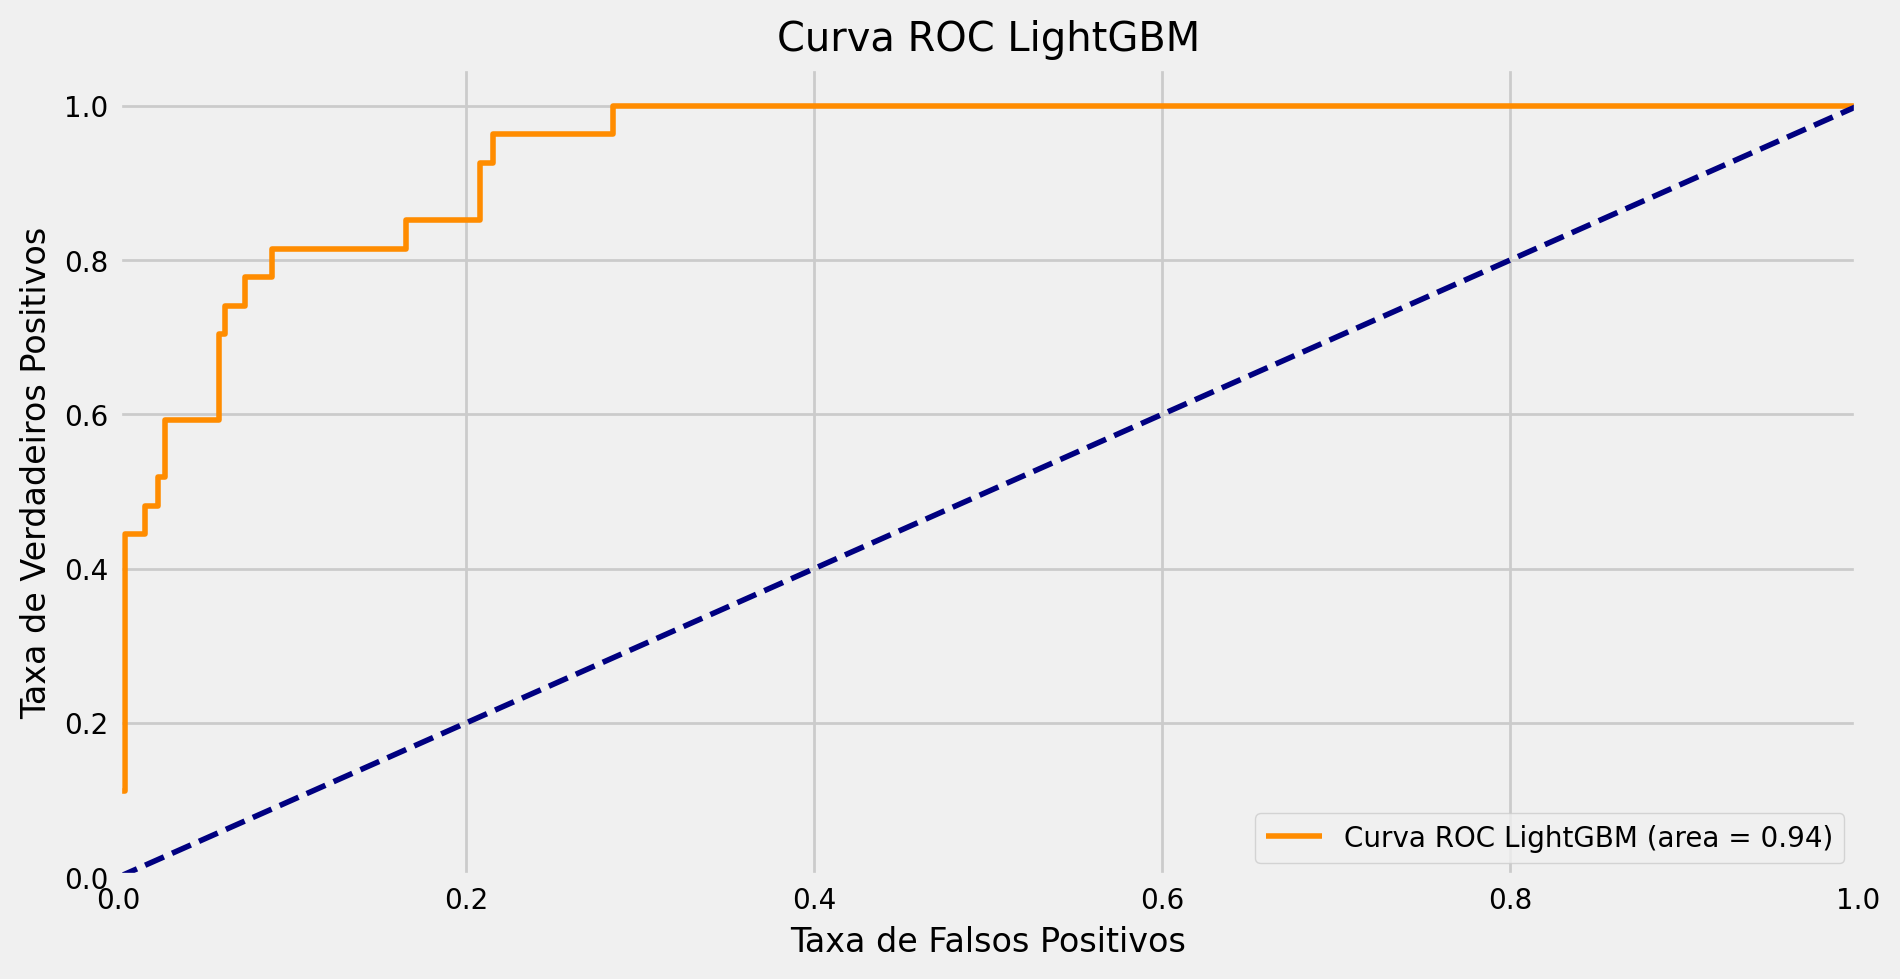

In [ ]:

import matplotlib.pyplot as plt
# Predição das probabilidades para a classe positiva
y_pred_proba_lgb = random_search_lgb.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test, y_pred_proba_lgb)

# Calcular a AUC
roc_auc_lgb = auc(fpr_lgb, tpr_lgb)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr_lgb, tpr_lgb, color='darkorange', lw=2, label='Curva ROC LightGBM (area = %0.2f)' % roc_auc_lgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC LightGBM')
plt.legend(loc="lower right")
plt.show()


In [ ]:
## Modelo Catboost

from catboost import CatBoostClassifier

# Parâmetros para CatBoost
param_grid_cat = {
    'model__iterations': [100, 200, 300],
    'model__depth': [4, 6, 8],
    'model__learning_rate': [0.01, 0.1, 0.3],
    'model__l2_leaf_reg': [1, 3, 5]
}

# Inicialização do modelo CatBoost
cat_model = CatBoostClassifier(random_state=45, verbose=0)

# Pipeline com SMOTE e CatBoost
pipeline_cat = build_model_with_smote(cat_model)

# RandomizedSearchCV para CatBoost
random_search_cat = RandomizedSearchCV(
    pipeline_cat,
    param_grid_cat,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# Treinamento do modelo
random_search_cat.fit(X_train, y_train)

# Exibindo os melhores parâmetros
print("Melhores parâmetros CatBoost:", random_search_cat.best_params_)

# Predição e avaliação
y_pred_cat = random_search_cat.predict(X_test)

# Métricas de avaliação
print("Acurácia CatBoost:", accuracy_score(y_test, y_pred_cat))
print("Precisão CatBoost:", precision_score(y_test, y_pred_cat, average='macro'))
print("Recall CatBoost:", recall_score(y_test, y_pred_cat, average='macro'))
print("F1-Score CatBoost:", f1_score(y_test, y_pred_cat, average='macro'))
print("AUC CatBoost:", roc_auc_score(y_test, random_search_cat.predict_proba(X_test)[:, 1]))
print("Matriz de Confusão CatBoost:\n", confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

Melhores parâmetros CatBoost: {'model__learning_rate': 0.01, 'model__l2_leaf_reg': 1, 'model__iterations': 300, 'model__depth': 4}
Acurácia CatBoost: 0.9303135888501742
Precisão CatBoost: 0.7990076335877863
Recall CatBoost: 0.778988603988604
F1-Score CatBoost: 0.7885352195697024
AUC CatBoost: 0.9387464387464387
Matriz de Confusão CatBoost:
 [[251   9]
 [ 11  16]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       260
           1       0.64      0.59      0.62        27

    accuracy                           0.93       287
   macro avg       0.80      0.78      0.79       287
weighted avg       0.93      0.93      0.93       287



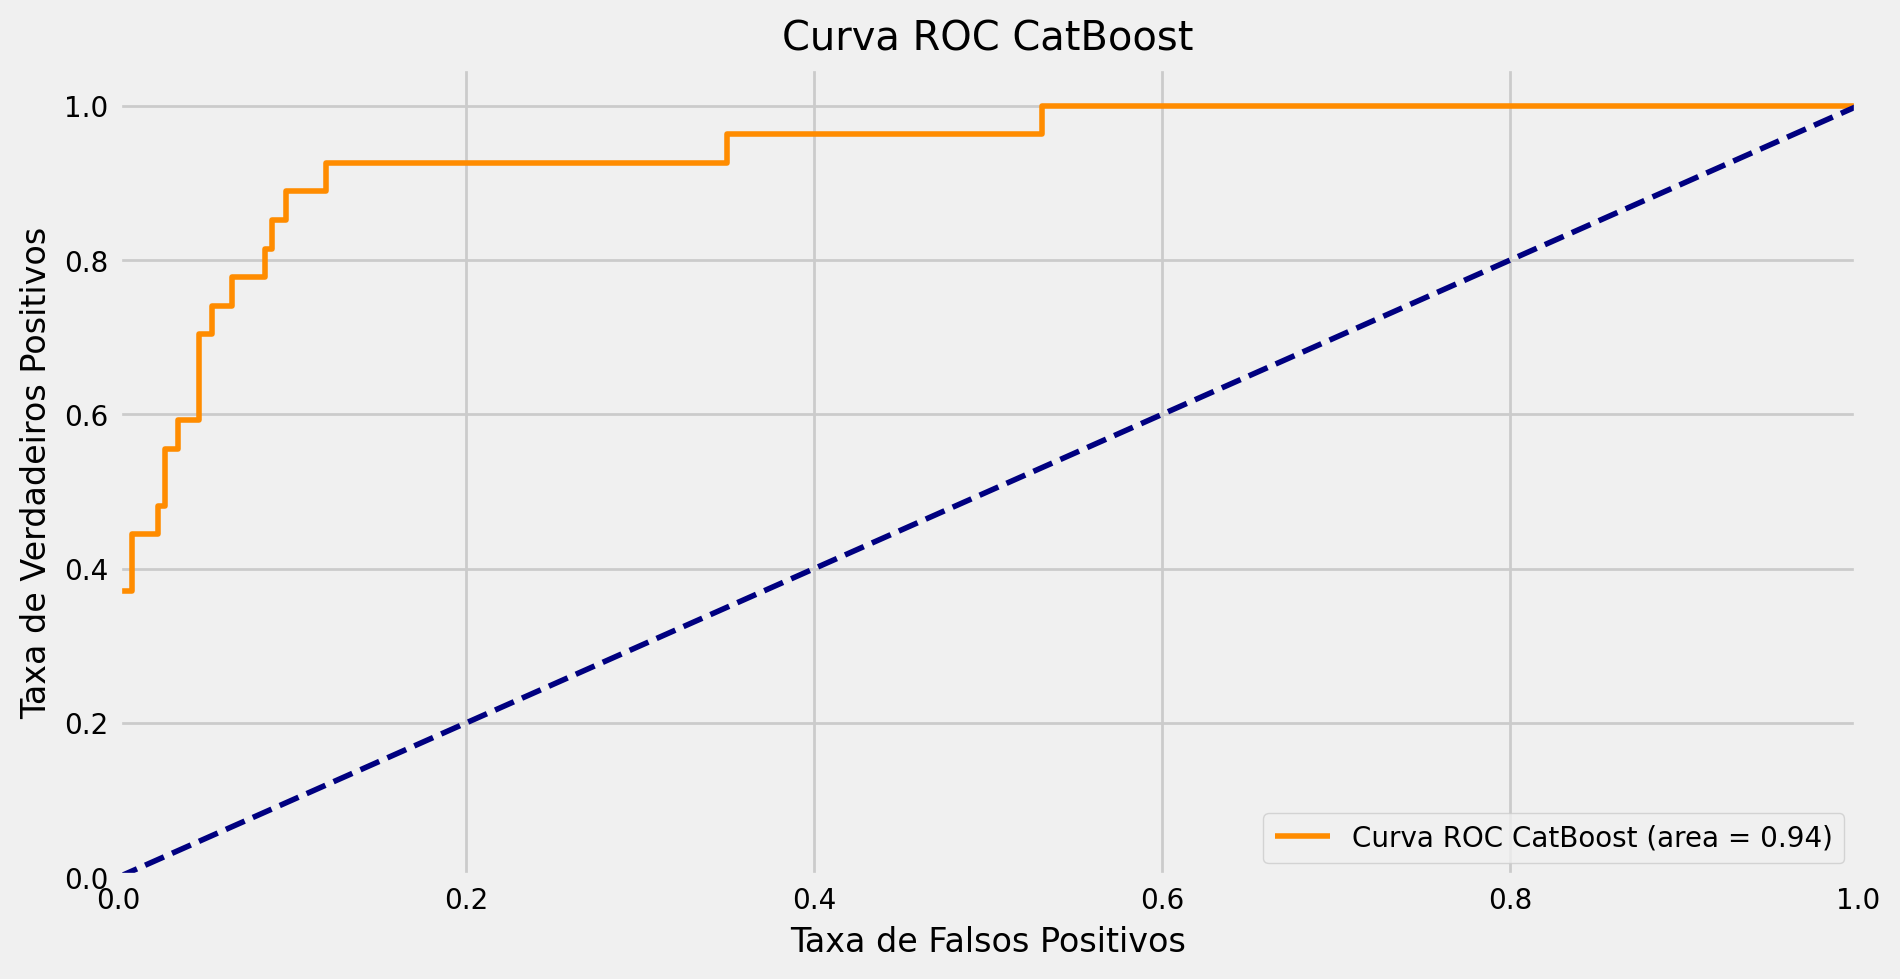

In [ ]:
import matplotlib.pyplot as plt
# Predição das probabilidades para a classe positiva
y_pred_proba_cat = random_search_cat.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr_cat, tpr_cat, thresholds_cat = roc_curve(y_test, y_pred_proba_cat)

# Calcular a AUC
roc_auc_cat = auc(fpr_cat, tpr_cat)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr_cat, tpr_cat, color='darkorange', lw=2, label='Curva ROC CatBoost (area = %0.2f)' % roc_auc_cat)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC CatBoost')
plt.legend(loc="lower right")
plt.show()


In [ ]:
### Modelo Random Forest

from sklearn.ensemble import RandomForestClassifier

# Parâmetros para RandomForest
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Inicialização do modelo RandomForest
rf_model = RandomForestClassifier(random_state=45)

# Pipeline com SMOTE e RandomForest
pipeline_rf = build_model_with_smote(rf_model)

# RandomizedSearchCV para RandomForest
random_search_rf = RandomizedSearchCV(
    pipeline_rf,
    param_grid_rf,
    n_iter=20,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

# Treinamento do modelo
random_search_rf.fit(X_train, y_train)

# Exibindo os melhores parâmetros
print("Melhores parâmetros RandomForest:", random_search_rf.best_params_)

# Predição e avaliação
y_pred_rf = random_search_rf.predict(X_test)

# Métricas de avaliação
print("Acurácia RandomForest:", accuracy_score(y_test, y_pred_rf))
print("Precisão RandomForest:", precision_score(y_test, y_pred_rf, average='macro'))
print("Recall RandomForest:", recall_score(y_test, y_pred_rf, average='macro'))
print("F1-Score RandomForest:", f1_score(y_test, y_pred_rf, average='macro'))
print("AUC RandomForest:", roc_auc_score(y_test, random_search_rf.predict_proba(X_test)[:, 1]))
print("Matriz de Confusão RandomForest:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Melhores parâmetros RandomForest: {'model__n_estimators': 300, 'model__min_samples_split': 5, 'model__min_samples_leaf': 2, 'model__max_depth': 20}
Acurácia RandomForest: 0.9372822299651568
Precisão RandomForest: 0.8724264705882353
Recall RandomForest: 0.7164529914529915
F1-Score RandomForest: 0.768796992481203
AUC RandomForest: 0.938034188034188
Matriz de Confusão RandomForest:
 [[257   3]
 [ 15  12]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       260
           1       0.80      0.44      0.57        27

    accuracy                           0.94       287
   macro avg       0.87      0.72      0.77       287
weighted avg       0.93      0.94      0.93       287



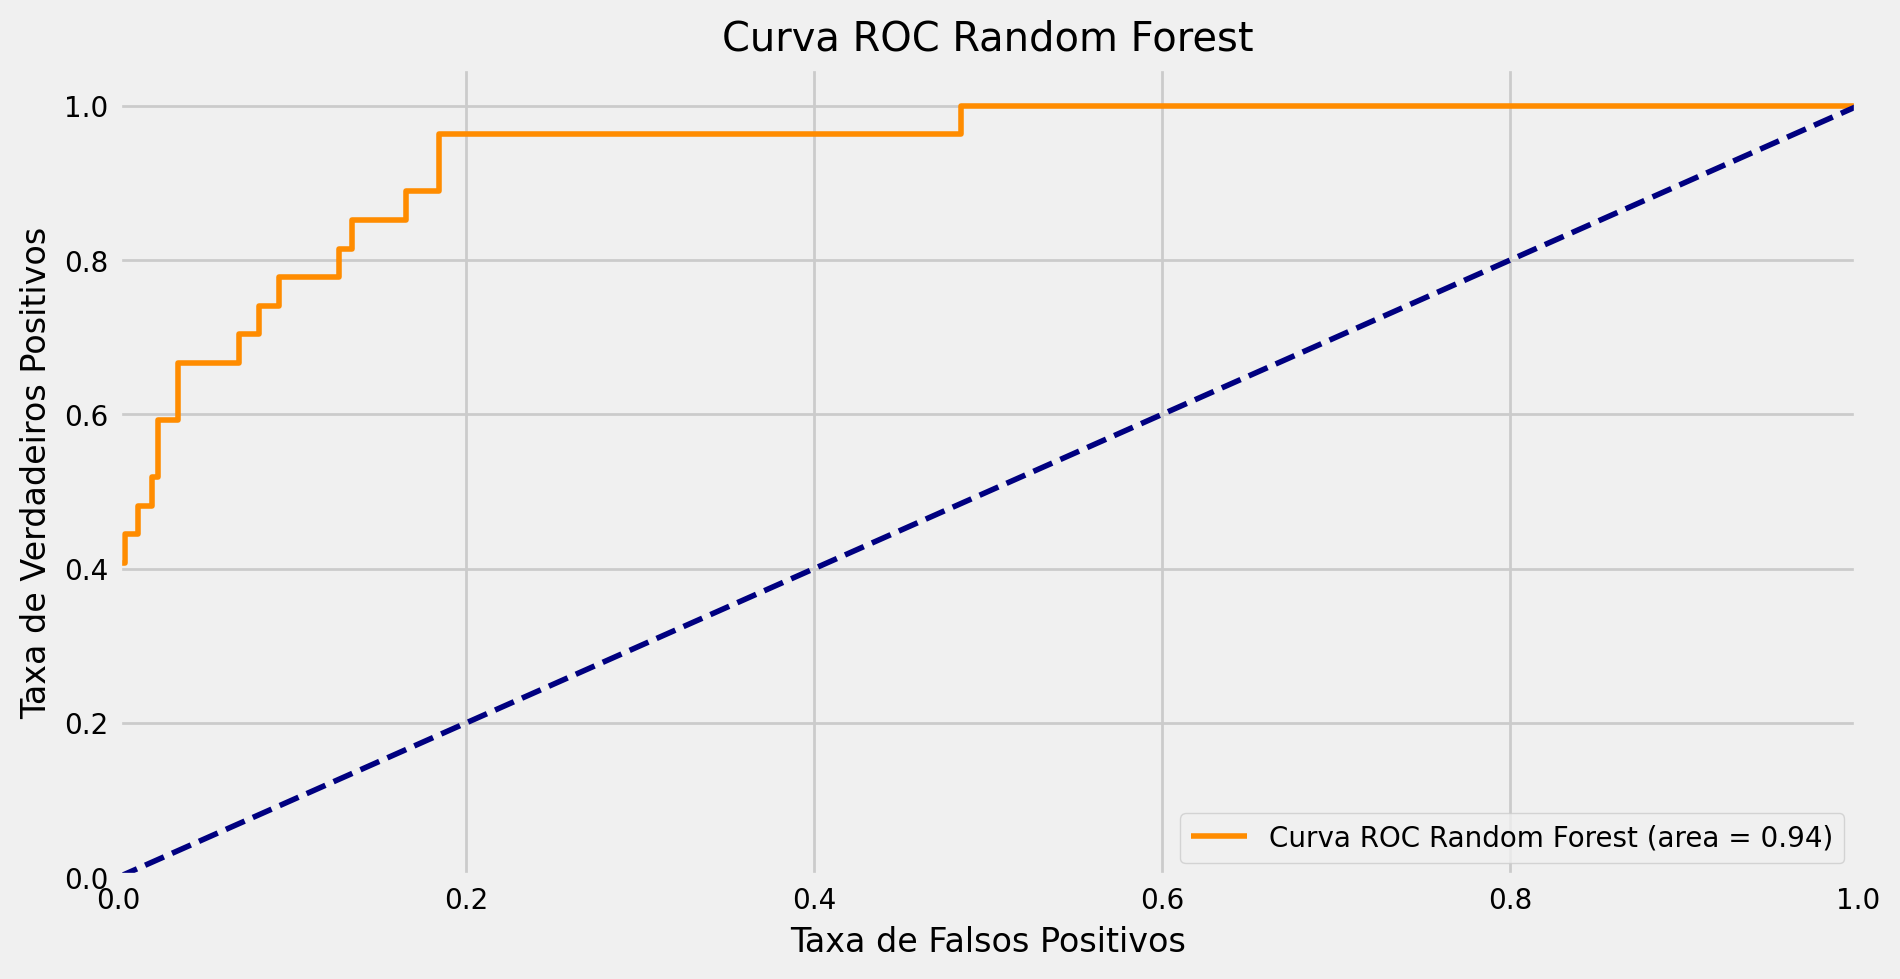

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predição das probabilidades para a classe positiva
y_pred_proba_rf = random_search_rf.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)

# Calcular a AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Curva ROC Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC Random Forest')
plt.legend(loc="lower right")
plt.show()


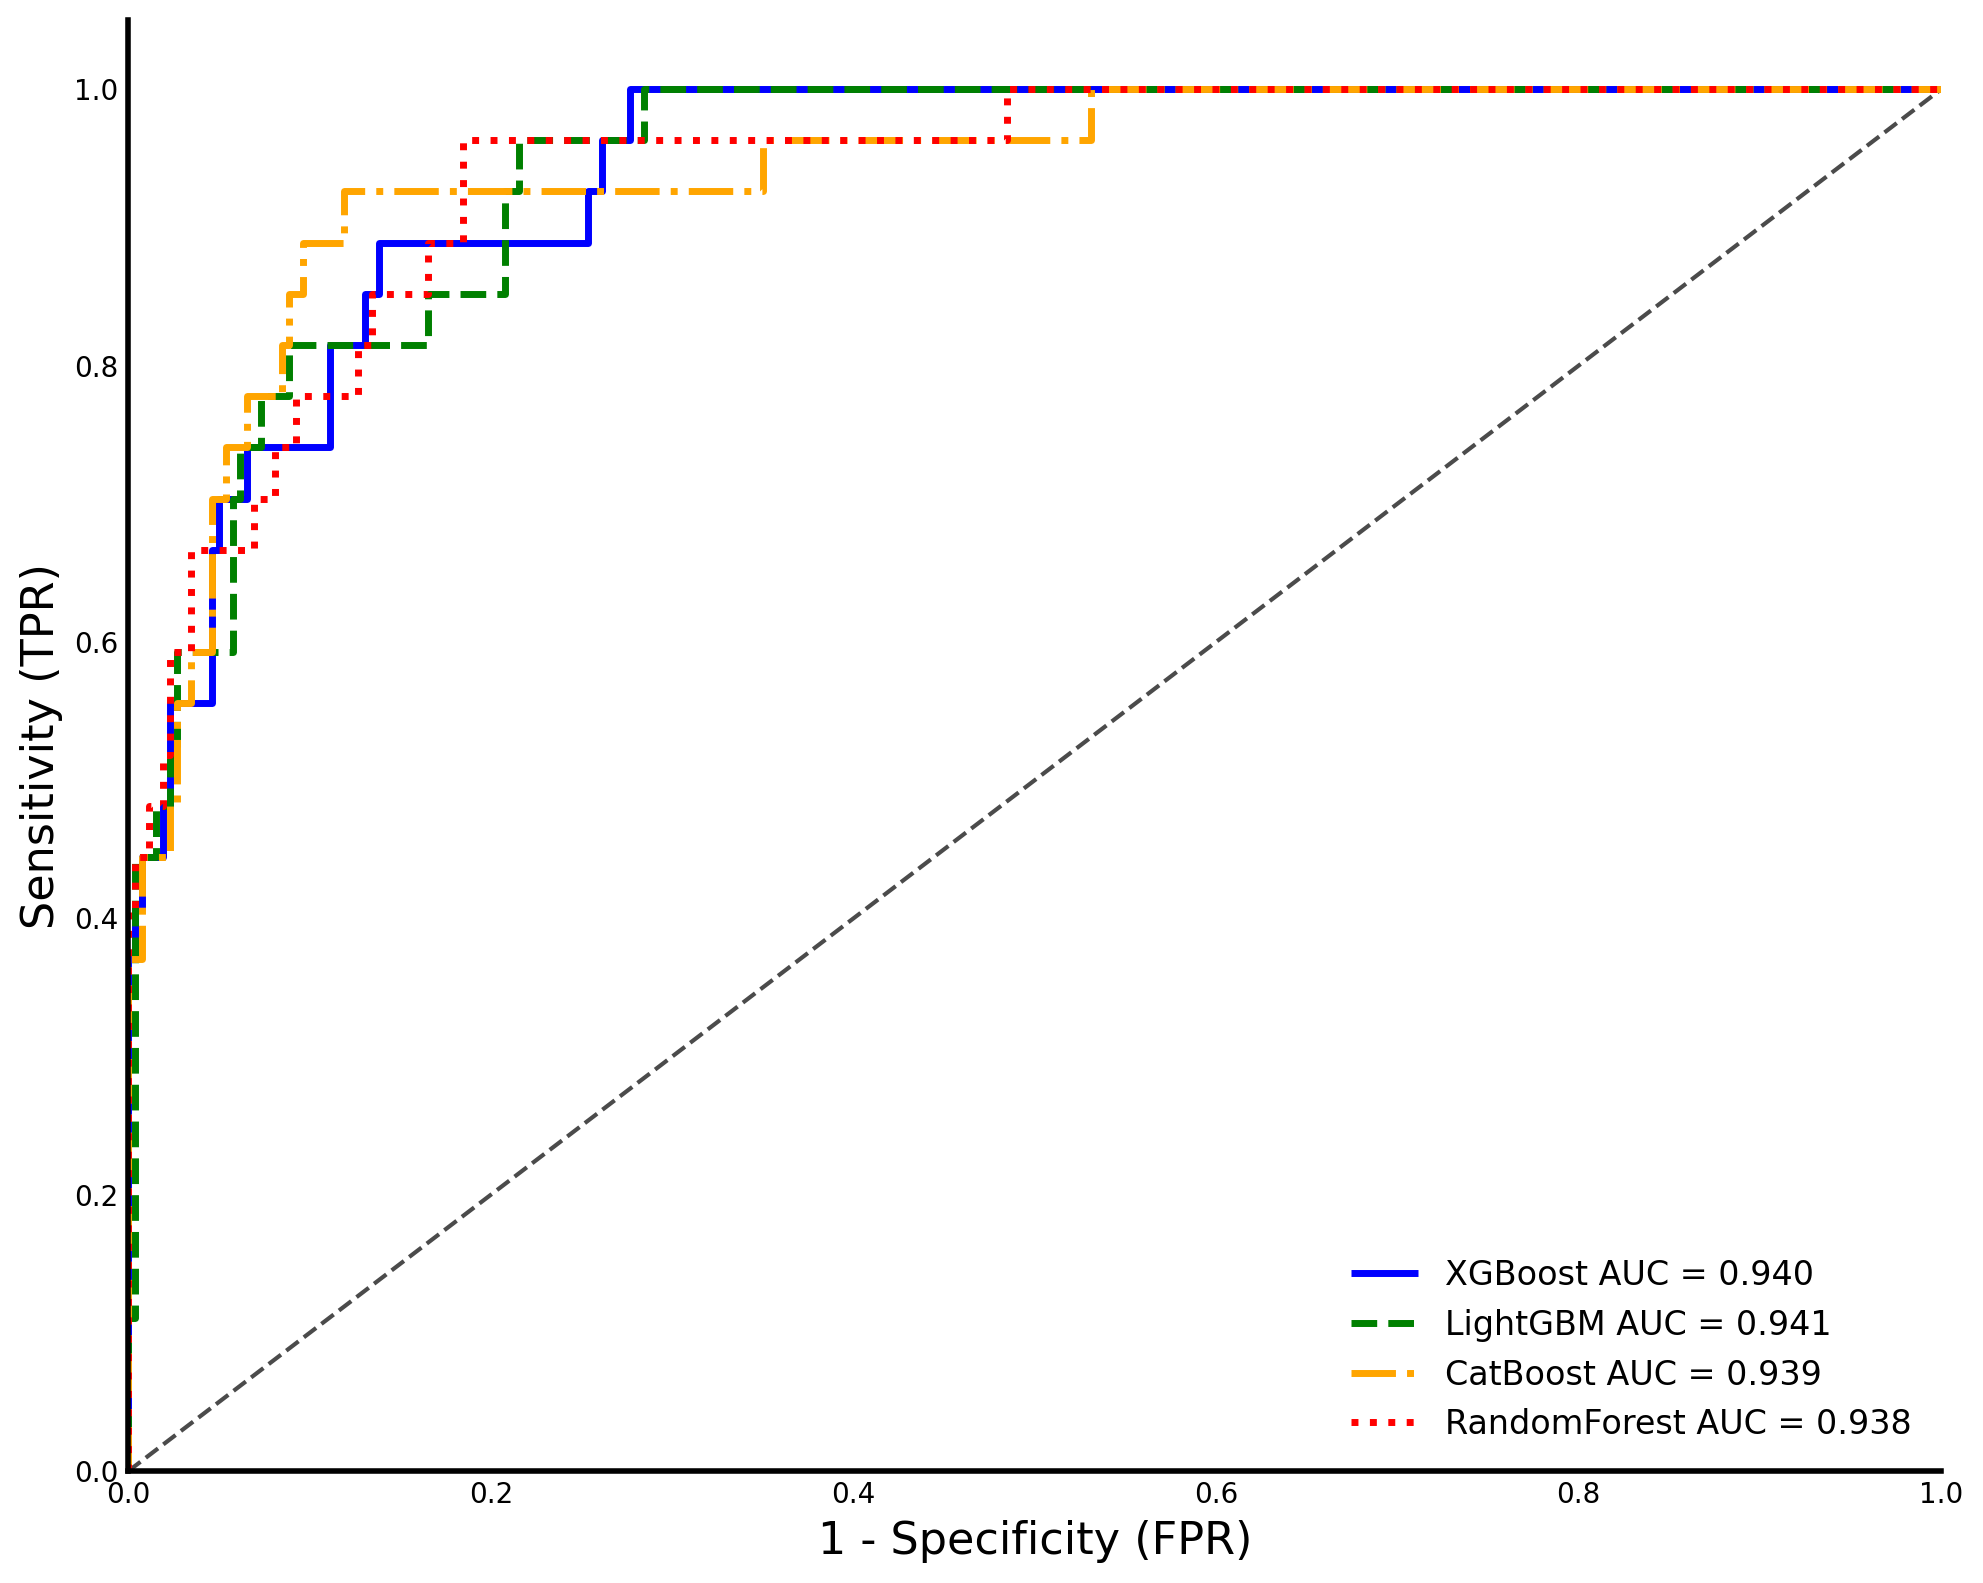

In [ ]:
# Plote das graficos da Curva com todo modelos

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Função para adicionar a curva ROC ao plot
def add_roc_curve(model, X_test, y_test, model_name, ax, line_style, color):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, linestyle=line_style, color=color, linewidth=2.5, label=f'{model_name} AUC = {roc_auc:.3f}')

# Configuração do plot
fig, ax = plt.subplots(figsize=(10, 8))

# Adicionar a linha base (diagonal) para referência
ax.plot([0, 1], [0, 1], 'k--', linewidth=1.5, alpha=0.7)

# Definir limites e rótulos dos eixos
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('1 - Specificity (FPR)', fontsize=16)
ax.set_ylabel('Sensitivity (TPR)', fontsize=16)

# Remover qualquer fundo visível, tornando o gráfico transparente
fig.patch.set_alpha(0.0)  # Fundo da figura transparente
ax.patch.set_alpha(0.0)   # Fundo do gráfico transparente

# Somente eixos X e Y visíveis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(2)

# Remover qualquer grade
ax.grid(False)

# Adicionando as curvas ROC para cada modelo
add_roc_curve(random_search_xgb, X_test, y_test, 'XGBoost', ax, line_style='-', color='blue')
add_roc_curve(random_search_lgb, X_test, y_test, 'LightGBM', ax, line_style='--', color='green')
add_roc_curve(random_search_cat, X_test, y_test, 'CatBoost', ax, line_style='-.', color='orange')
add_roc_curve(random_search_rf, X_test, y_test, 'RandomForest', ax, line_style=':', color='red')

# Ajuste da legenda e do layout
ax.legend(loc='lower right', fontsize=12, frameon=False)

# Ajustar layout para evitar cortes
plt.tight_layout()

# Mostrar o gráfico com fundo transparente
plt.show()


In [ ]:
### Tabela com metricas de Performance

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef

# Função para calcular métricas e retornar como um dicionário
def calculate_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro'),
        'MCC': matthews_corrcoef(y_test, y_pred),  # Adicionando o coeficiente MCC
        'AUC': roc_auc_score(y_test, y_prob)

    }
    return metrics

# Cálculo das métricas para cada modelo
xgb_metrics = calculate_metrics(random_search_xgb, X_test, y_test)
lgb_metrics = calculate_metrics(random_search_lgb, X_test, y_test)
cat_metrics = calculate_metrics(random_search_cat, X_test, y_test)
rf_metrics = calculate_metrics(random_search_rf, X_test, y_test)

# Criando um DataFrame para exibir os resultados
models_metrics = pd.DataFrame({
    'XGBoost': xgb_metrics,
    'LightGBM': lgb_metrics,
    'CatBoost': cat_metrics,
    'RandomForest': rf_metrics
})

# Transpondo o DataFrame para melhor visualização
models_metrics = models_metrics.T

# Formatação dos números para melhor legibilidade
models_metrics = models_metrics.round(3)

# Exibindo a tabela
print(models_metrics)



              Accuracy  Precision  Recall  F1-Score  MCC  AUC
XGBoost           0.92       0.76    0.77      0.77 0.54 0.94
LightGBM          0.92       0.76    0.77      0.77 0.54 0.94
CatBoost          0.93       0.80    0.78      0.79 0.58 0.94
RandomForest      0.94       0.87    0.72      0.77 0.57 0.94


              Accuracy  Precision  Recall  F1-Score  AUC  MCC
XGBoost           0.92       0.76    0.77      0.77 0.94 0.54
LightGBM          0.92       0.76    0.77      0.77 0.94 0.54
CatBoost          0.93       0.80    0.78      0.79 0.94 0.58
RandomForest      0.94       0.87    0.72      0.77 0.94 0.57


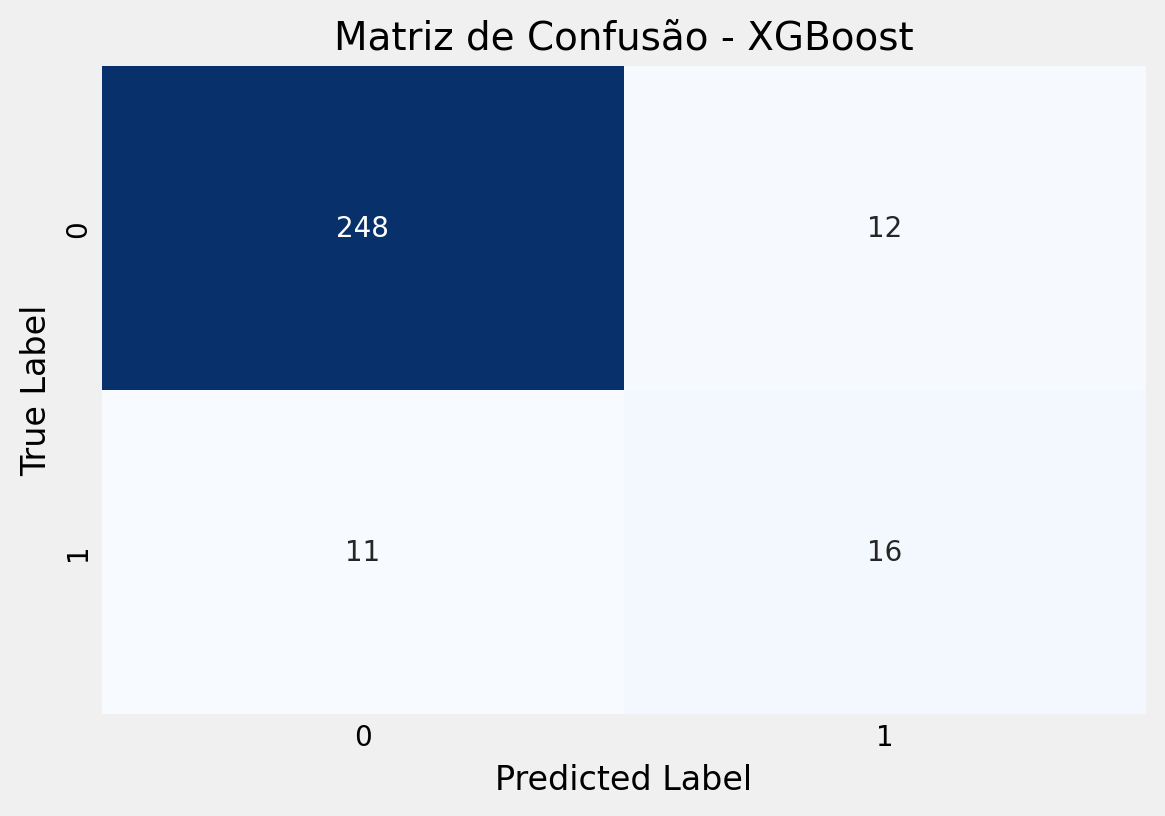

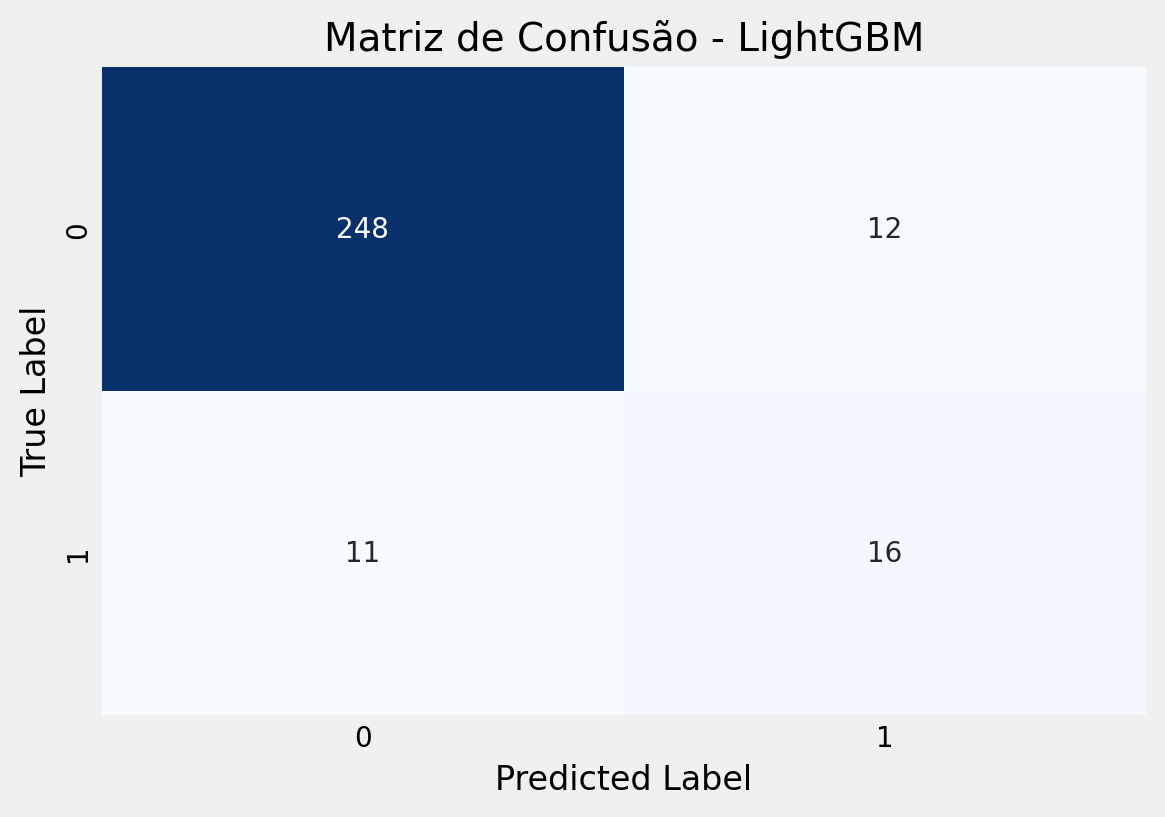

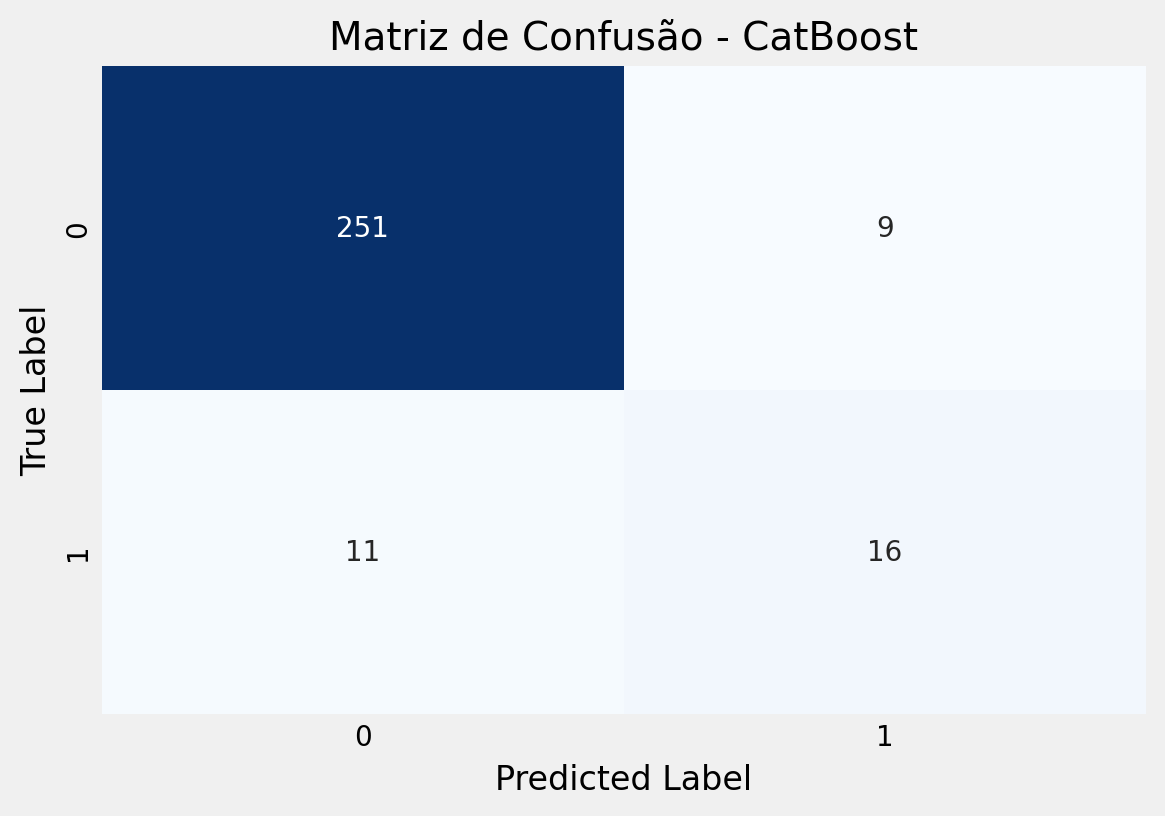

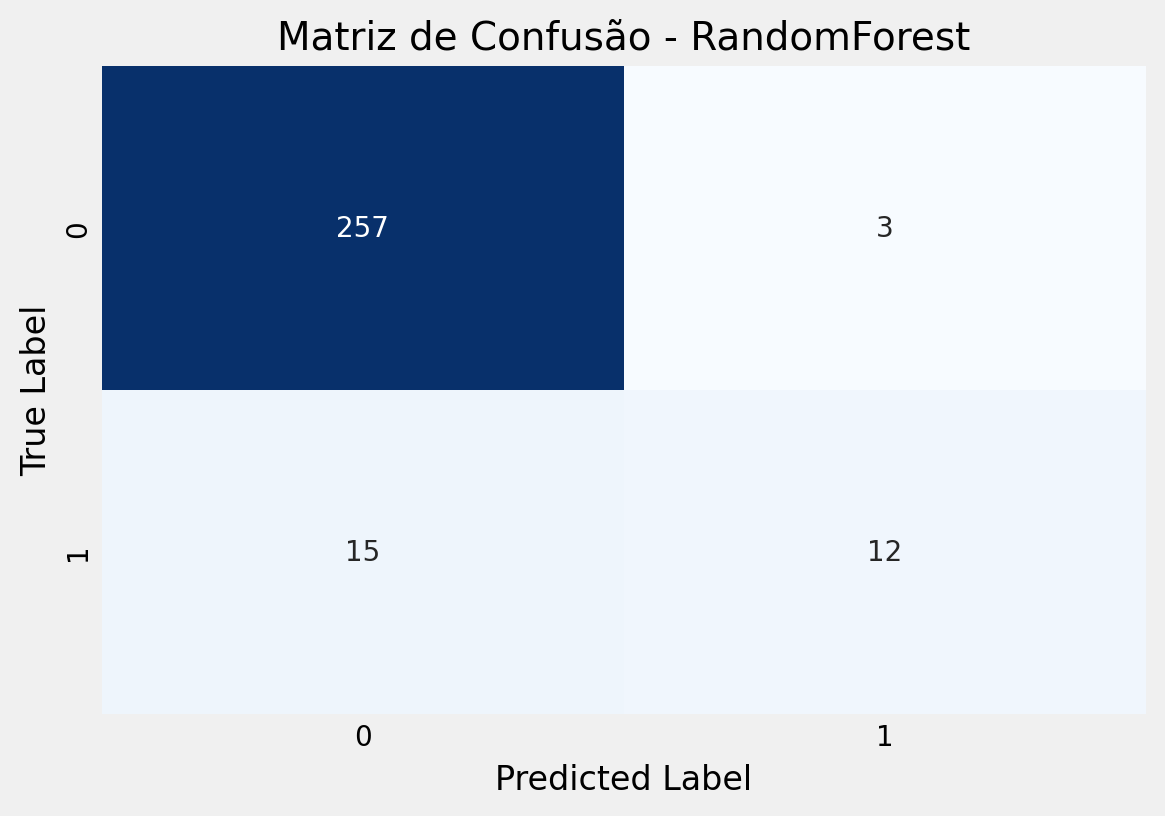

In [ ]:
## Matriz de Confusão

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix

# Função para calcular métricas e retornar como um dicionário
def calculate_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro'),
        'AUC': roc_auc_score(y_test, y_prob),
        'MCC': matthews_corrcoef(y_test, y_pred)
    }
    return metrics, y_pred

# Função para plotar a matriz de confusão
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusão - {model_name}', fontsize=14)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Cálculo das métricas e das previsões para cada modelo
xgb_metrics, xgb_pred = calculate_metrics(random_search_xgb, X_test, y_test)
lgb_metrics, lgb_pred = calculate_metrics(random_search_lgb, X_test, y_test)
cat_metrics, cat_pred = calculate_metrics(random_search_cat, X_test, y_test)
rf_metrics, rf_pred = calculate_metrics(random_search_rf, X_test, y_test)

# Criando um DataFrame para exibir os resultados
models_metrics = pd.DataFrame({
    'XGBoost': xgb_metrics,
    'LightGBM': lgb_metrics,
    'CatBoost': cat_metrics,
    'RandomForest': rf_metrics
})

# Transpondo o DataFrame para melhor visualização
models_metrics = models_metrics.T

# Formatação dos números para melhor legibilidade
models_metrics = models_metrics.round(3)

# Exibindo a tabela
print(models_metrics)

# Plotando a matriz de confusão para cada modelo
plot_confusion_matrix(y_test, xgb_pred, 'XGBoost')
plot_confusion_matrix(y_test, lgb_pred, 'LightGBM')
plot_confusion_matrix(y_test, cat_pred, 'CatBoost')
plot_confusion_matrix(y_test, rf_pred, 'RandomForest')



In [ ]:
feature_mapping = {
    'a_idade': 'Maternal age',
    'a_estat1': 'Height (1st trimester)',
    'b_estat1': 'Height (2nd trimester)',
    'a_pesopre': 'Pre-gestational weight',
    'b_pesoat': 'Gestational weight (2nd trimester)',
    'a_pesoat': 'Gestational weight (1st trimester)',
    'a_circbracm': 'Arm circumference (1st trimester)',
    'b_circbracm': 'Arm circumference (2nd trimester)',
    'a_rendpcr': 'Per capita income',
    'a_escola': 'Years of schooling (1st trimester)',
    'a_hb': 'Hemoglobin (1st trimester)',
    'b_hb': 'Hemoglobin (2nd trimester)',
    'a_npari': 'Number of previous pregnancies (1st trimester)',
    'a_npcomo': 'Number of previous deliveries (1st trimester)',
    'a_imcpg': 'Pre-gestational BMI',
    'a_imcga': 'Gestational BMI (1st trimester)',
    'b_imcga': 'Gestational BMI (2nd trimester)',
    'a_fmp': 'Body fat (%) (1st trimester)',
    'b_fmp': 'Body fat (%) (2nd trimester)',
    'a_hba1c': 'Glycated hemoglobin (1st trimester)',
    'a_pcr': 'C-reactive protein (1st trimester)',
    'b_pcr': 'C-reactive protein (2nd trimester)',
    'a_hdl': 'HDL (1st trimester)',
    'b_hdl': 'HDL (2nd trimester)',
    'a_ldl': 'LDL (1st trimester)',
    'b_ldl': 'LDL (2nd trimester)',
    'a_ct': 'Cholesterol (1st trimester)',
    'b_ct': 'Cholesterol (2nd trimester)',
    'a_cor_1': 'Race (1st trimester) - White',
    'a_cor_2': 'Race (1st trimester) - Black',
    'a_cor_3': 'Race (1st trimester) - Asian',
    'a_cor_4': 'Race (1st trimester) - Indigenous',
    'a_cor_5': 'Race (1st trimester) - Mixed',
    'a_civil_1': 'Marital status (1st trimester) - Married',
    'a_civil_2': 'Marital status (1st trimester) - Single (with partner)',
    'a_civil_3': 'Marital status (1st trimester) - Single (without partner)',
    'a_vigord_1': 'Physical activity (1st trimester) - Yes',
    'a_vigord_2': 'Physical activity (1st trimester) - No',
    'a_fumog_1': 'Smoking (1st trimester) - Yes',
    'a_fumog_2': 'Smoking (1st trimester) - No',
    'a_alcool_0': 'Alcohol (1st trimester) - No',
    'a_alcool_1': 'Alcohol (1st trimester) - Yes',
    'a_agdm_0': 'Diabetes (1st trimester) - No',
    'a_agdm_1': 'Diabetes (1st trimester) - Yes',
    'b_agdm_0': 'Diabetes (2nd trimester) - No',
    'a_aghas_1': 'Hypertension (1st trimester)',
    'a_igadums_1': 'Gestational age in weeks (1st trimester)',
    'b_cor_1': 'Race (2nd trimester) - White',
    'b_cor_2': 'Race (2nd trimester) - Black',
    'b_cor_3': 'Race (2nd trimester) - Asian',
    'b_cor_4': 'Race (2nd trimester) - Indigenous',
    'b_cor_5': 'Race (2nd trimester) - Mixed',
    'b_civil_1': 'Marital status (2nd trimester) - Married',
    'b_civil_2': 'Marital status (2nd trimester) - Single (with partner)',
    'b_civil_3': 'Marital status (2nd trimester) - Single (without partner)',
    'b_vigord_1': 'Intense physical activity (2nd trimester) - Yes',
    'b_vigord_2': 'Intense physical activity (2nd trimester) - No',
    'b_fumog_1': 'Smoking (2nd trimester) - Yes',
    'b_fumog_2': 'Smoking (2nd trimester) - No',
    'b_agdm_1': 'Diabetes (2nd trimester)',
    'b_aghas_1': 'Hypertension (2nd trimester)',
    'b_igadums_1': 'Gestational age in weeks (2nd trimester)',
    'b_npari_1': 'Number of previous pregnancies (2nd trimester)',
    'b_escola': 'Years of schooling (2nd trimester)',
    'b_hba1c': 'Glycated hemoglobin (2nd trimester)',
    'd_IGUSGrn': 'Gestational age',
    'a_vigord_5': 'Vigorous physical activity (1st trimester)',
    'a_moderd_0': 'Moderate physical activity (2nd trimester) - No',
}


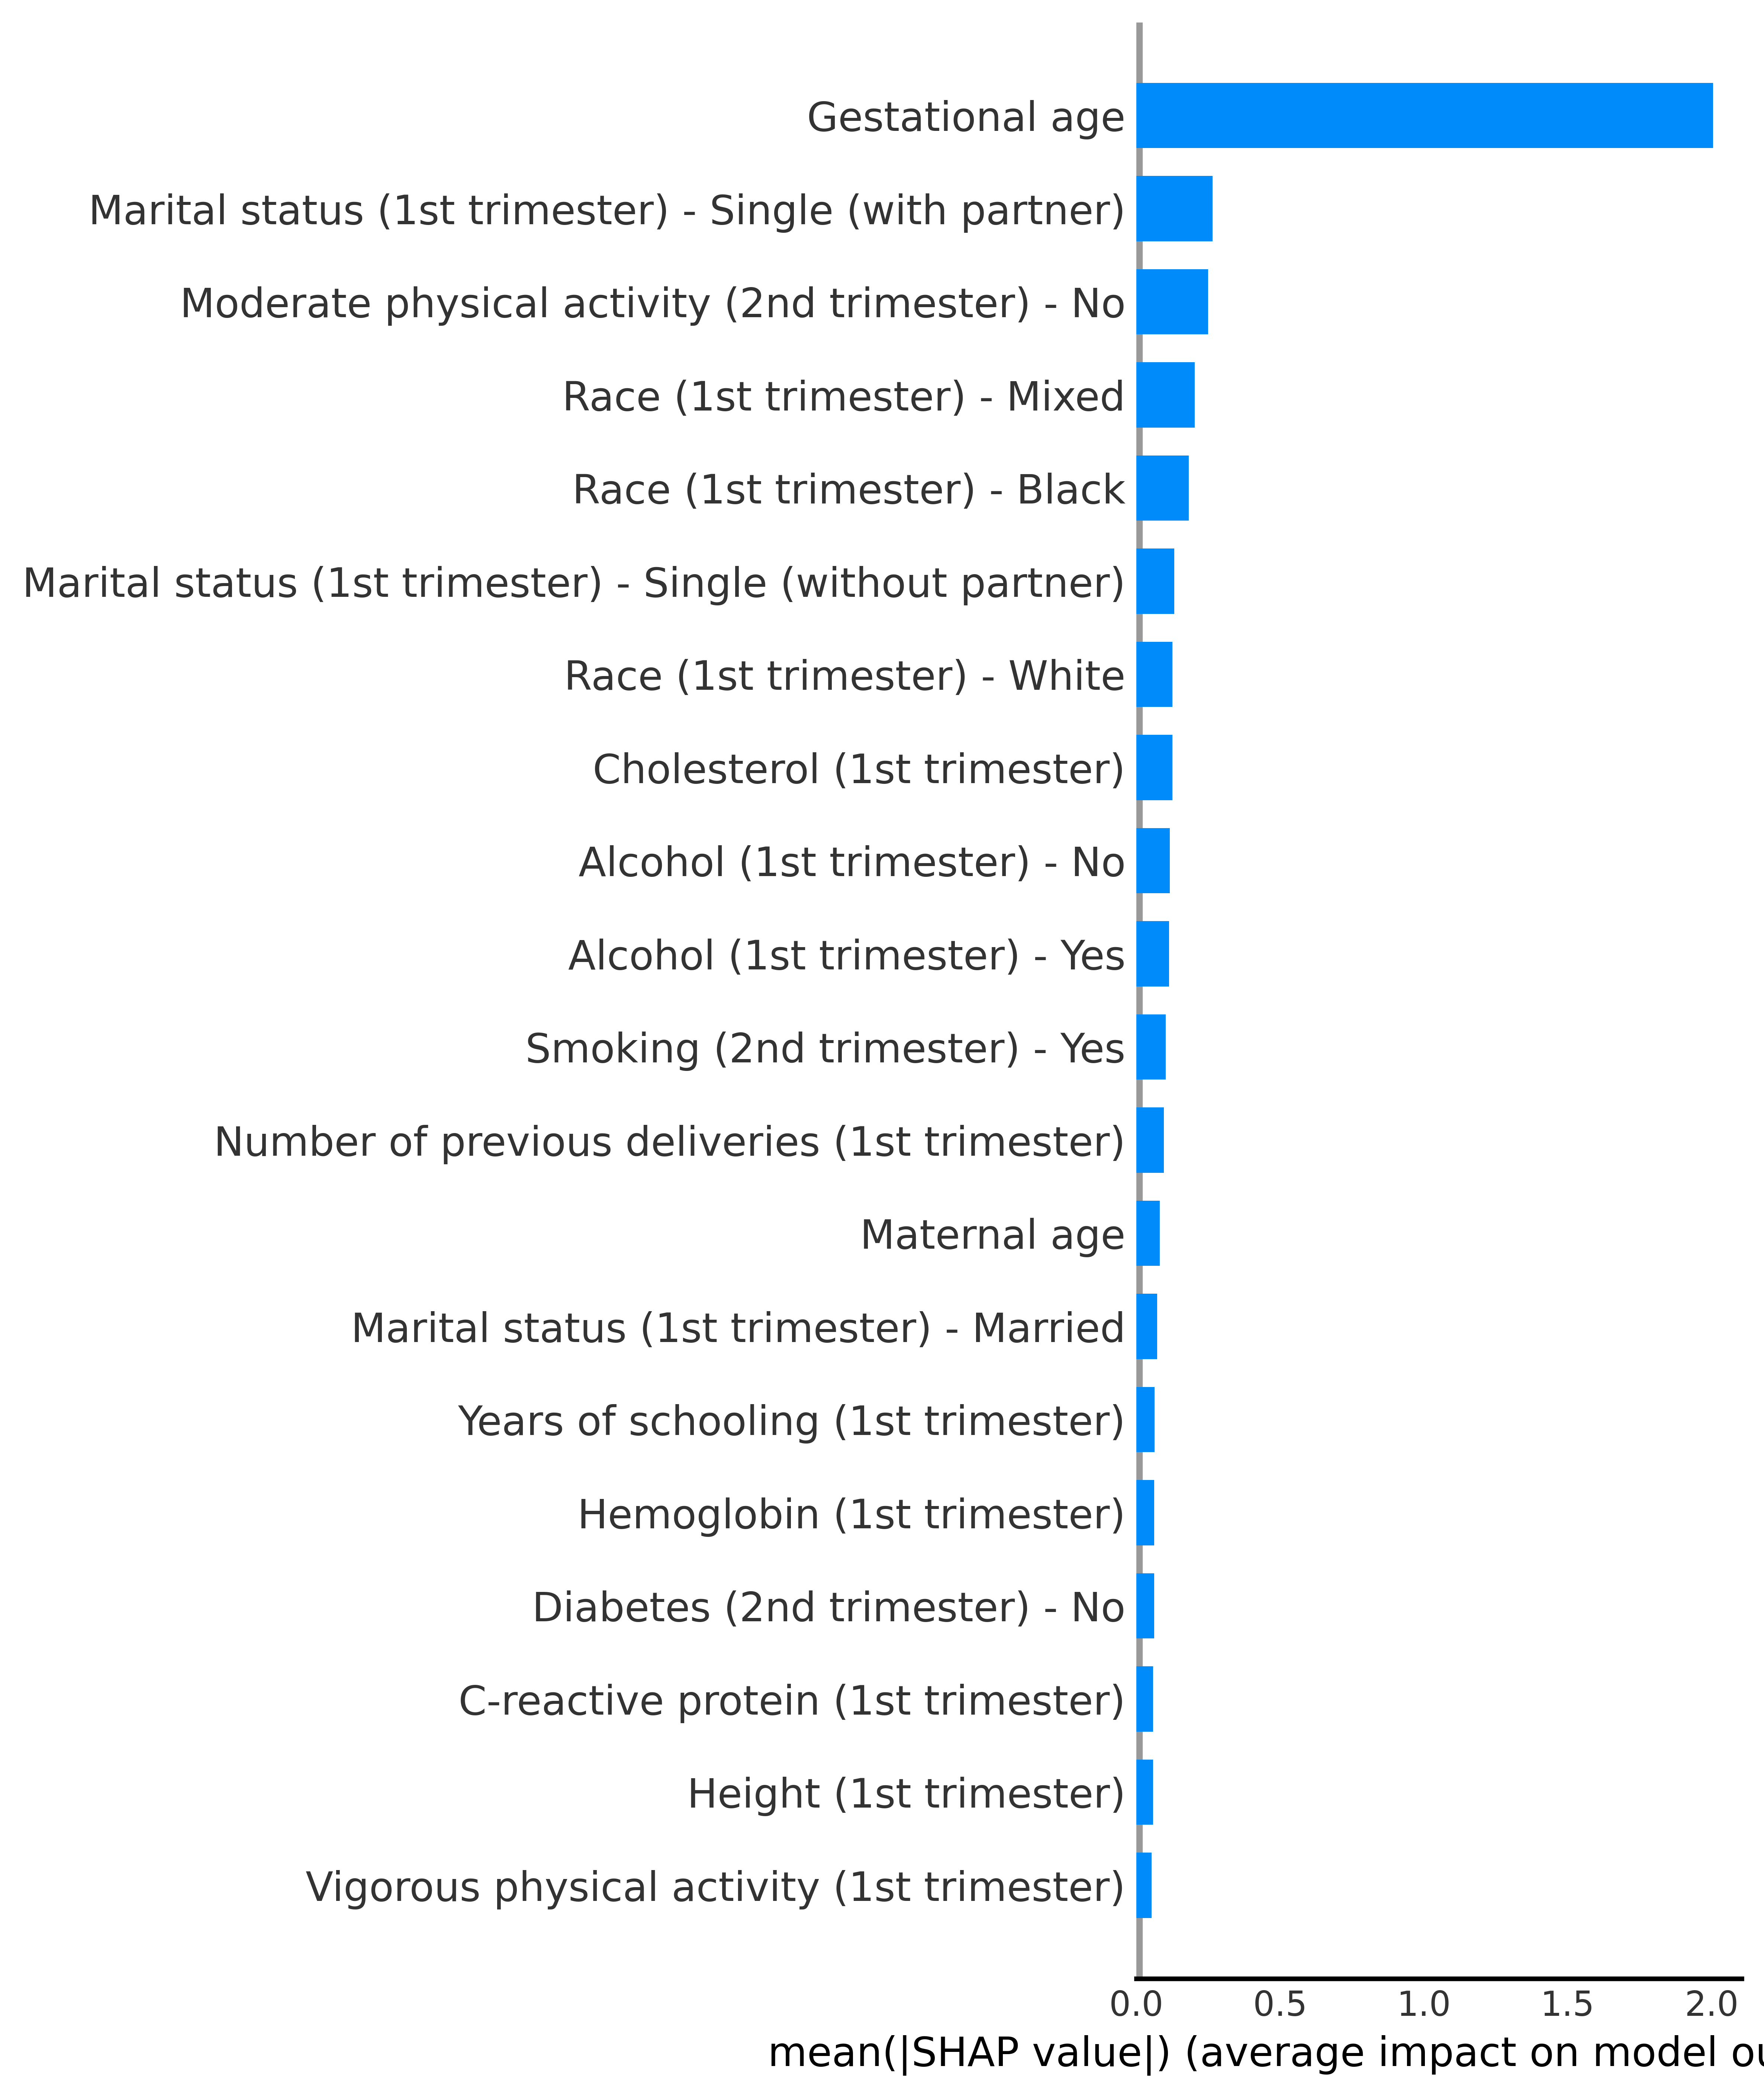

In [ ]:
##Análise com SHAP

# Instalar SHAP, caso ainda não esteja instalado
!pip install shap

import shap
import matplotlib.pyplot as plt

# Certifique-se de ter um dicionário de mapeamento de rótulos de features (feature_mapping)
feature_names = [feature_mapping.get(col, col) for col in X_test.columns]

# Criar o explicador SHAP para o modelo XGBoost (melhor modelo encontrado no RandomizedSearchCV)
explainer = shap.TreeExplainer(random_search_xgb.best_estimator_.named_steps['model'])

# Calcular os valores SHAP
shap_values = explainer.shap_values(X_test)

# Configurar o estilo do gráfico
plt.rcParams.update({
    'font.size': 10,   # Fonte menor para o gráfico
    'axes.edgecolor': 'black',  # Cor da borda dos eixos
    'axes.linewidth': 1.5,  # Espessura das linhas dos eixos
    'axes.grid': False,  # Remover grade
    'figure.facecolor': 'none',  # Fundo transparente
    'axes.facecolor': 'none'  # Fundo do gráfico transparente
    })

# Gerar o gráfico de sumário SHAP com contribuições positivas e negativas
shap.summary_plot(
    shap_values,
    X_test,
    feature_names=feature_names,
    show=False,  # Não mostrar o gráfico imediatamente para aplicar as personalizações
    plot_type='bar'
)

# Salvar o gráfico como uma imagem transparente
plt.savefig('shap_xgboost_transparent.png', bbox_inches='tight', transparent=True)

# Mostrar o gráfico
plt.show()

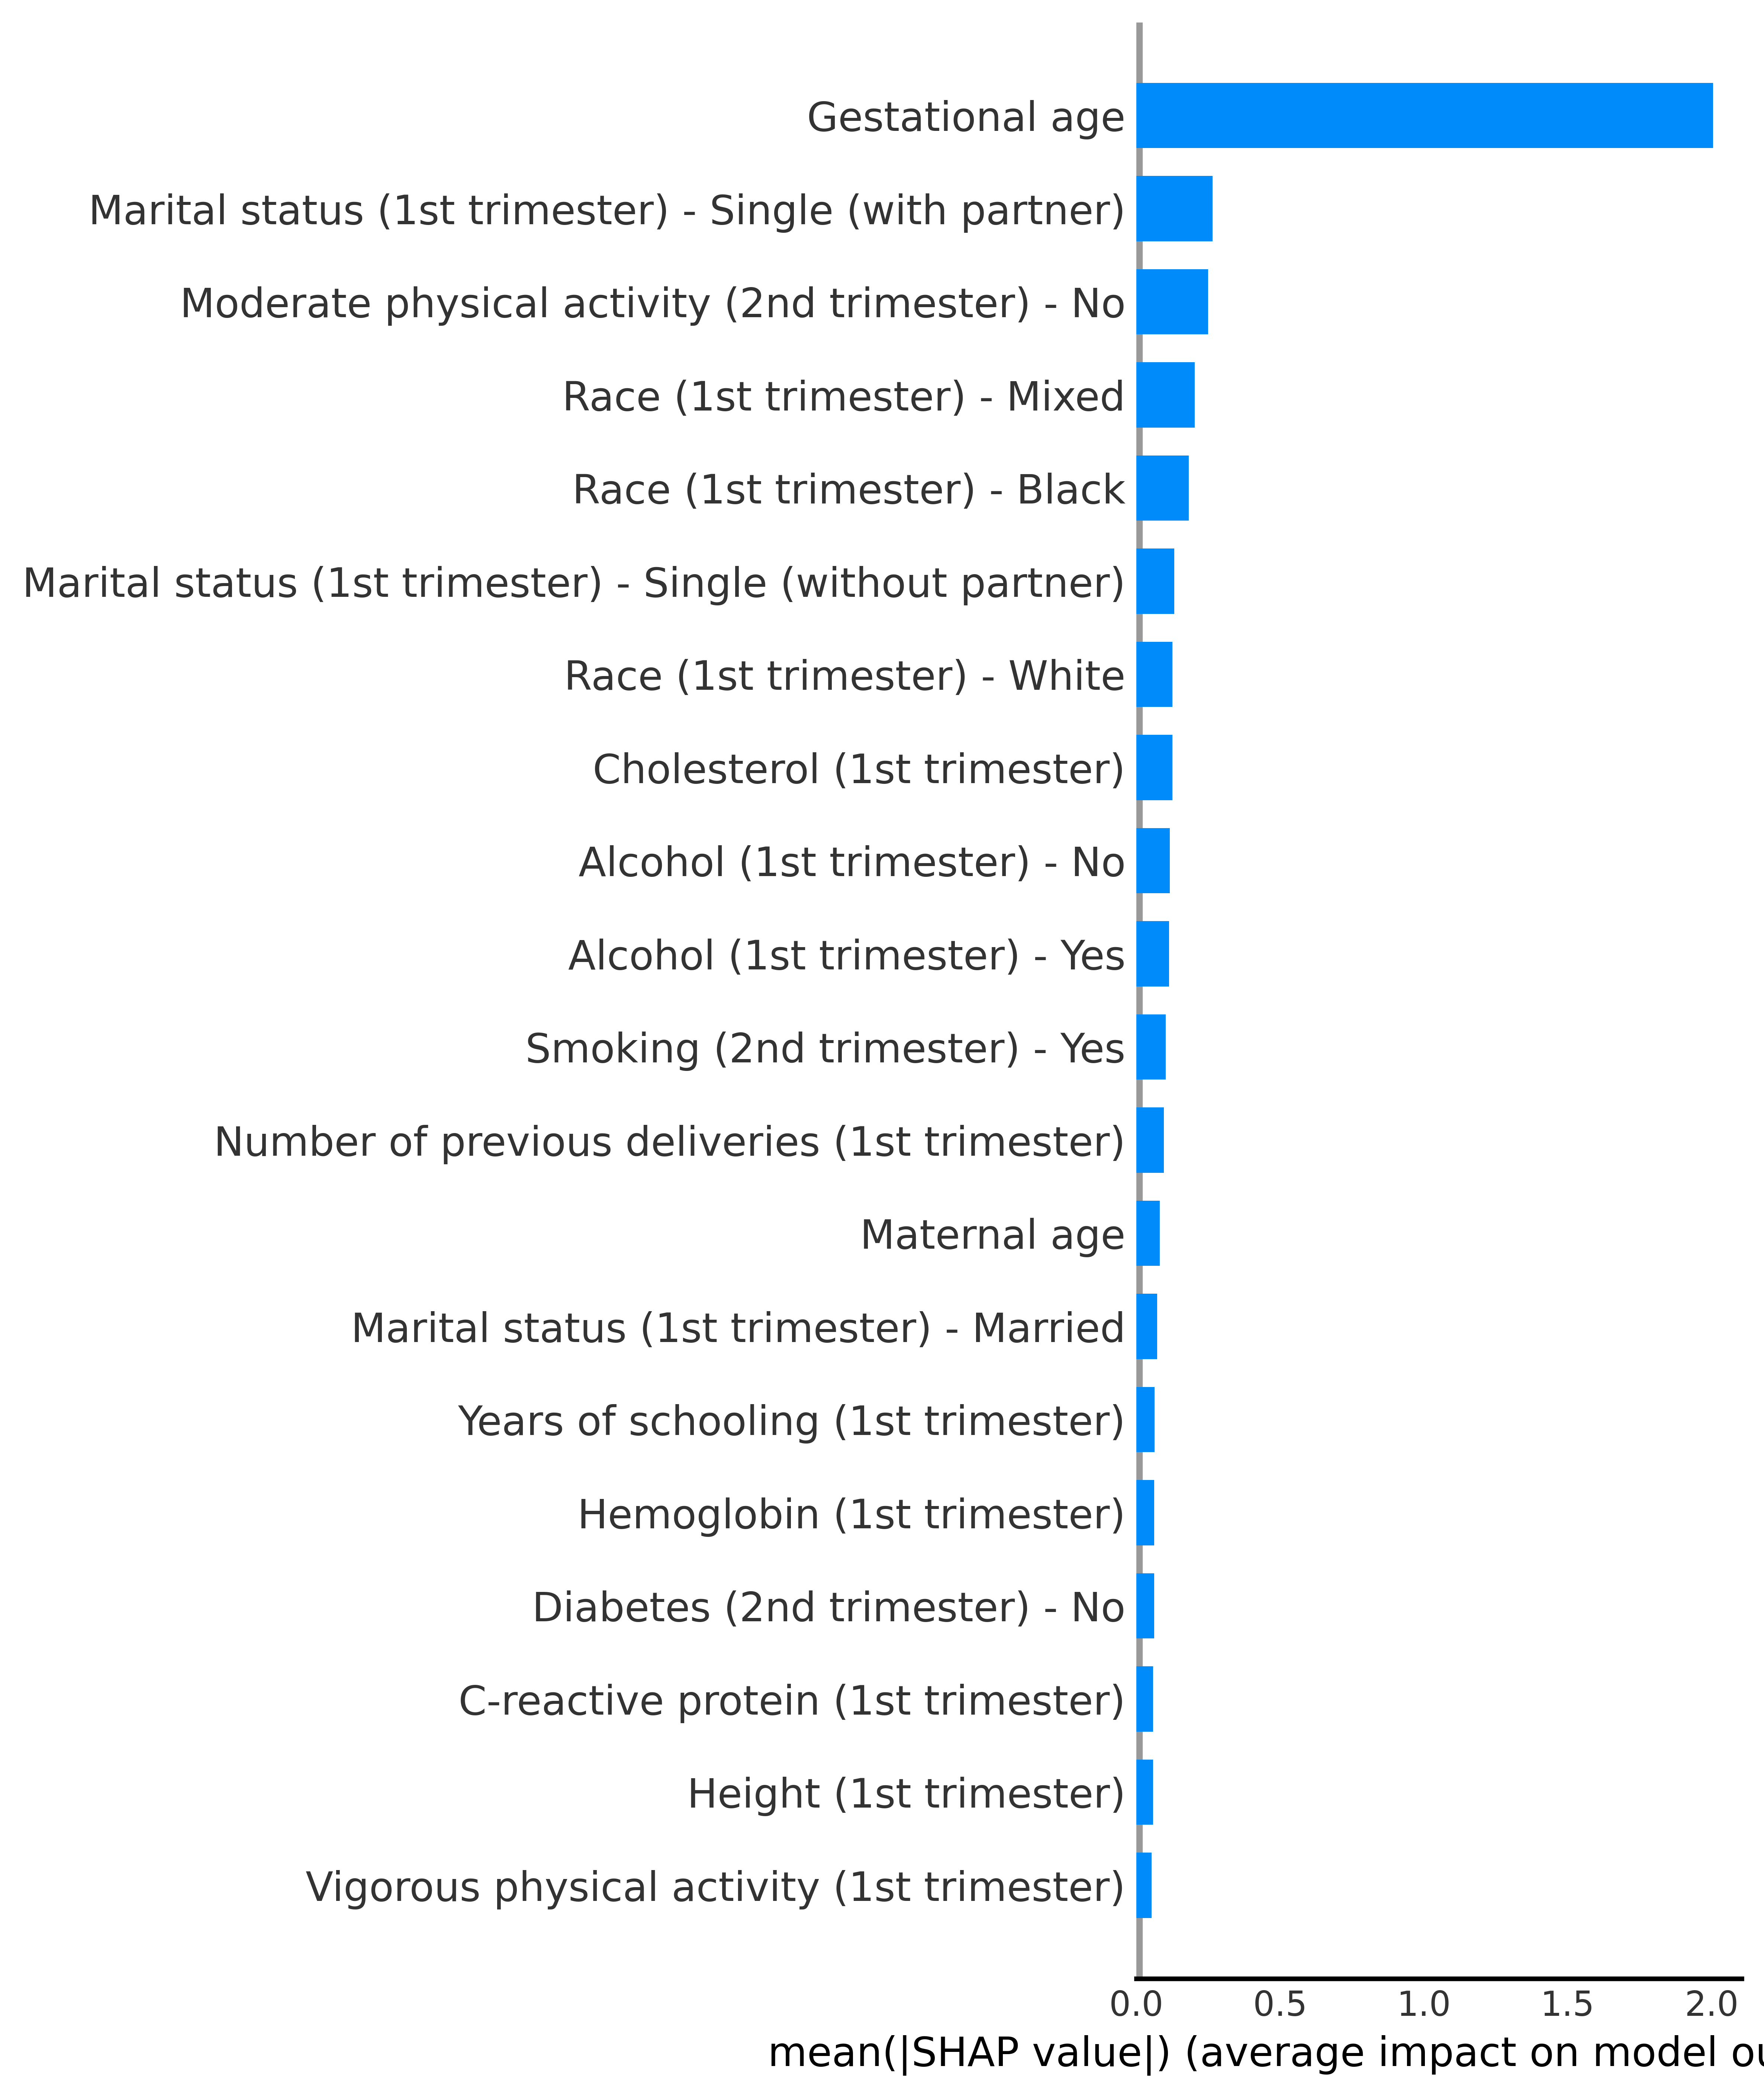

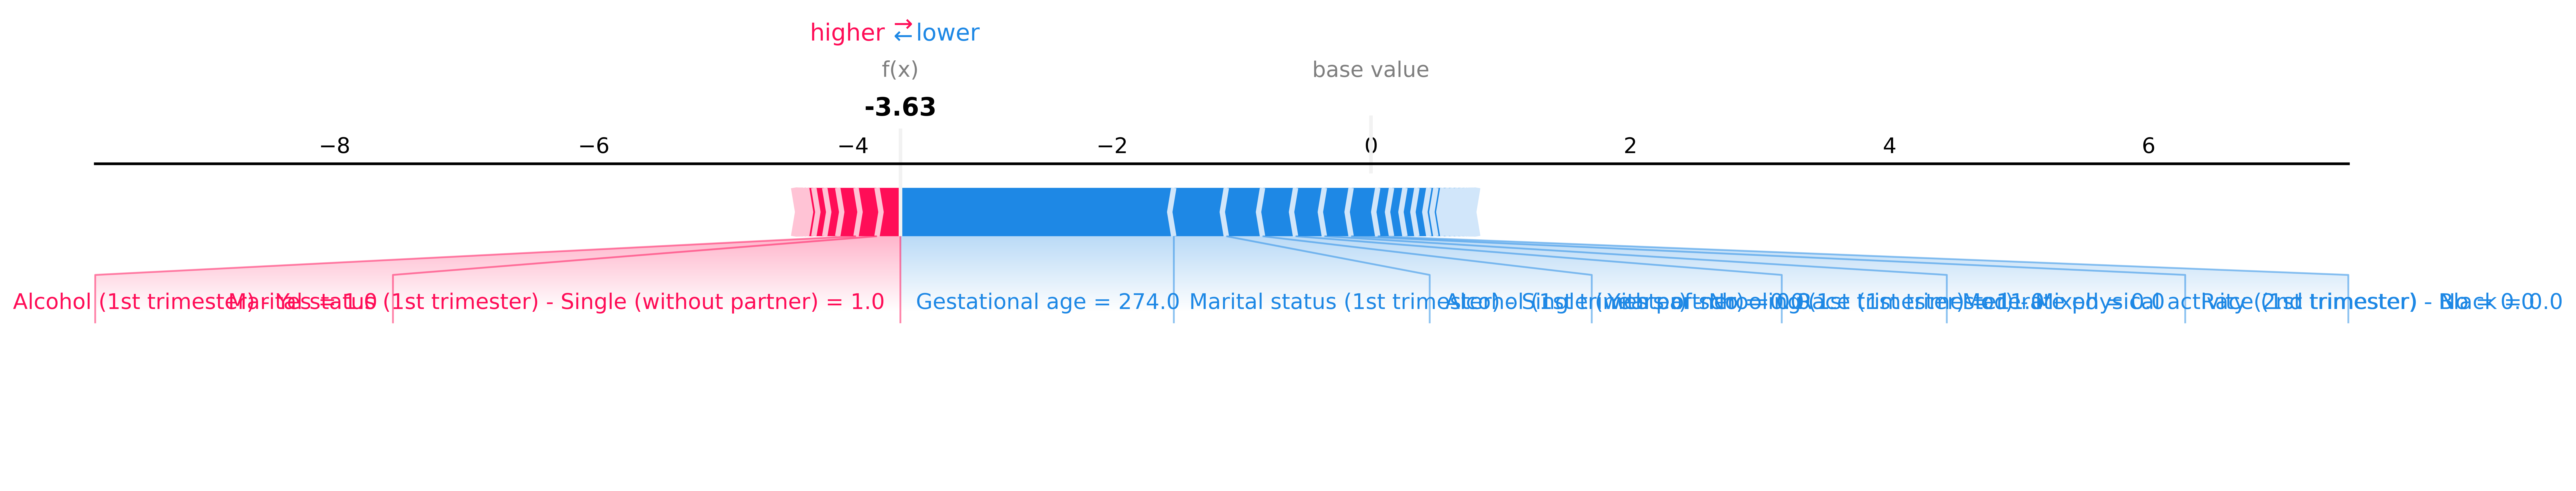

<Figure size 3000x1800 with 0 Axes>

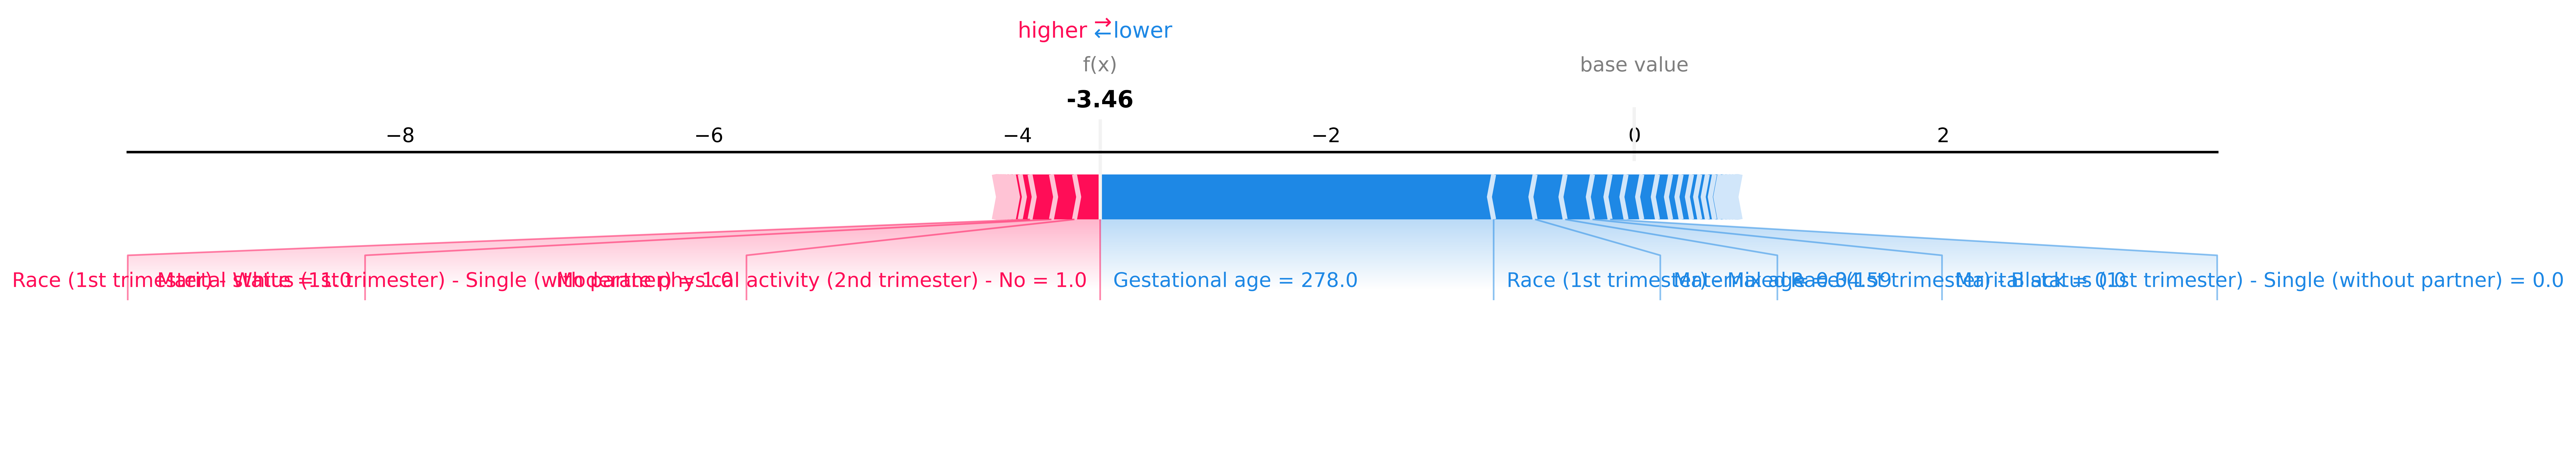

<Figure size 3000x1800 with 0 Axes>

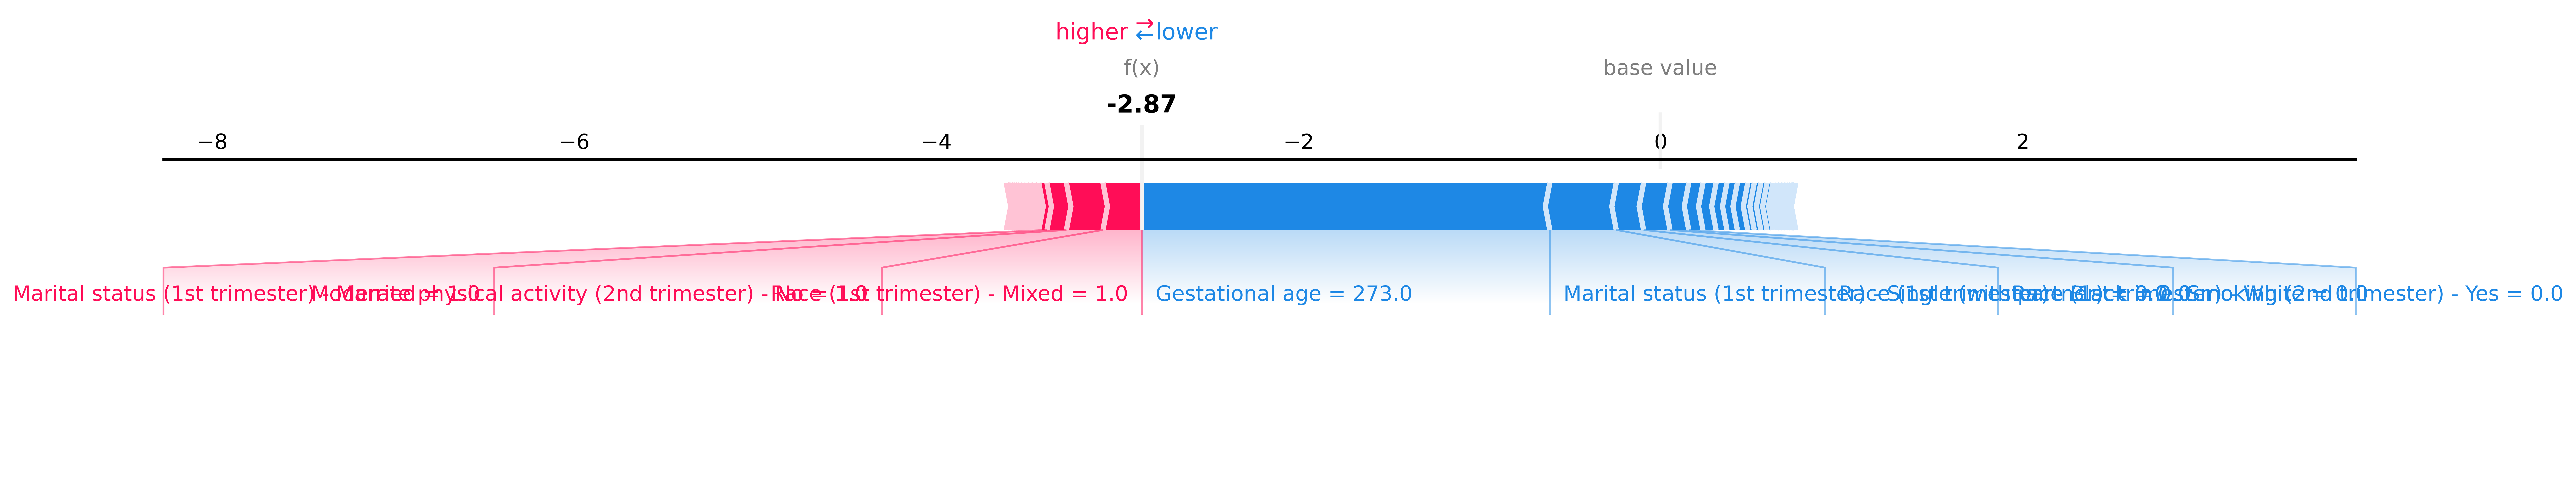

<Figure size 3000x1800 with 0 Axes>

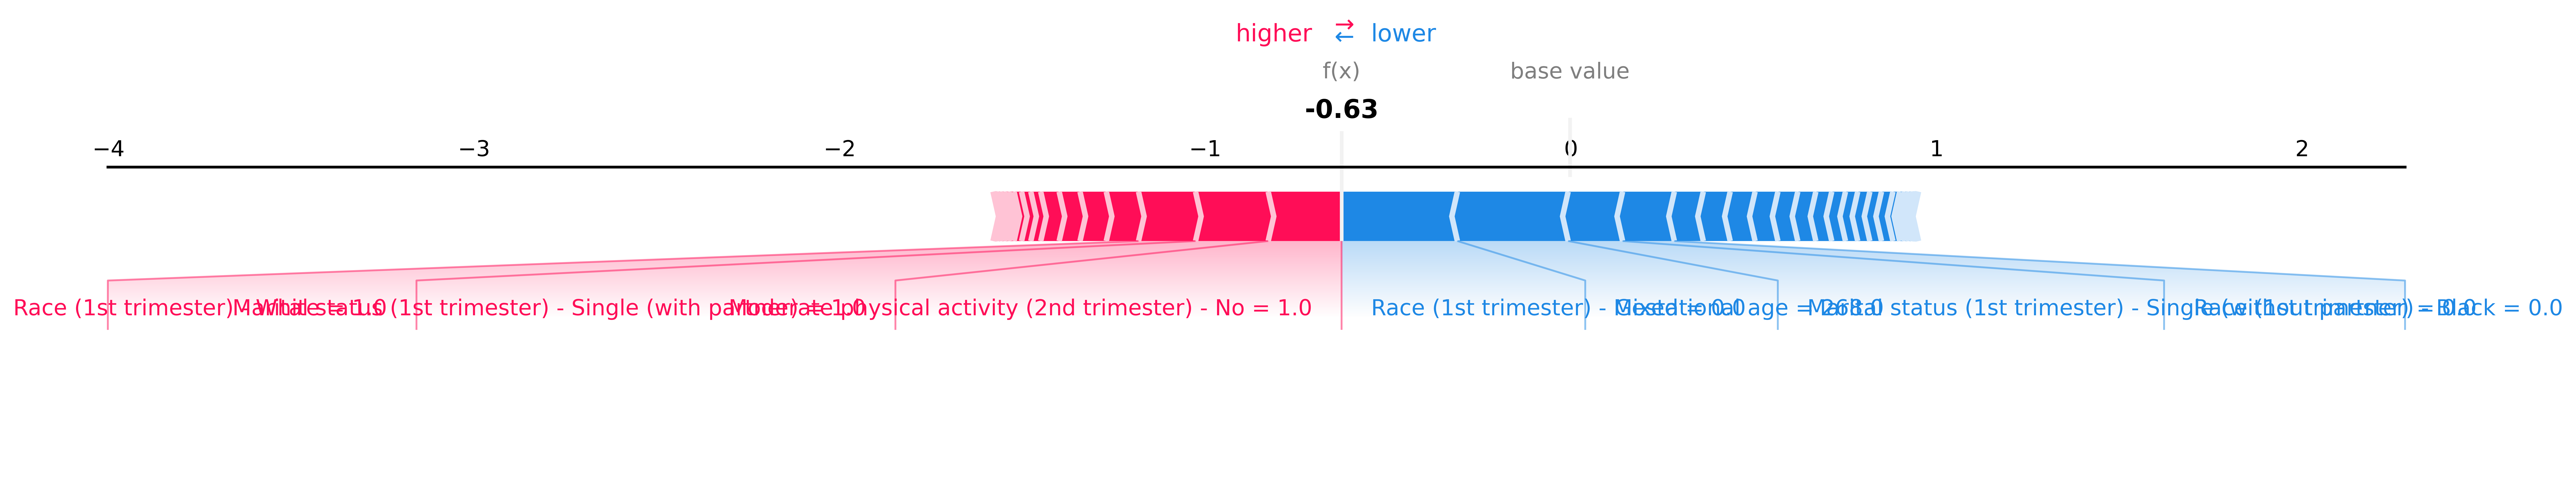

<Figure size 3000x1800 with 0 Axes>

In [ ]:
# Instalar SHAP, caso ainda não esteja instalado
!pip install shap

import shap
import matplotlib.pyplot as plt

# Certifique-se de ter um dicionário de mapeamento de rótulos de features (feature_mapping)
feature_names = [feature_mapping.get(col, col) for col in X_test.columns]

# Criar o explicador SHAP para o modelo XGBoost (melhor modelo encontrado no RandomizedSearchCV)
explainer = shap.TreeExplainer(random_search_xgb.best_estimator_.named_steps['model'])

# Calcular os valores SHAP para todas as amostras no conjunto de teste
shap_values = explainer.shap_values(X_test)

# Configurar o estilo do gráfico
plt.rcParams.update({
    'font.size': 10,   # Fonte menor para o gráfico
    'axes.edgecolor': 'black',  # Cor da borda dos eixos
    'axes.linewidth': 1.5,  # Espessura das linhas dos eixos
    'axes.grid': False,  # Remover grade
    'figure.facecolor': 'none',  # Fundo transparente
    'axes.facecolor': 'none'  # Fundo do gráfico transparente
})

# 1. Gerar o gráfico de sumário SHAP com contribuições positivas e negativas
shap.summary_plot(
    shap_values,
    X_test,
    feature_names=feature_names,
    show=False,  # Não mostrar o gráfico imediatamente para aplicar as personalizações
    plot_type='bar'
)

# Salvar o gráfico de sumário como uma imagem transparente
plt.savefig('shap_xgboost_summary_transparent.png', bbox_inches='tight', transparent=True)

# Mostrar o gráfico de sumário SHAP
plt.show()

# 2. Gerar gráficos de força SHAP para exemplos específicos

# Definir os índices dos exemplos que deseja visualizar (exemplos de pacientes)
examples = [0, 1, 2, 3]  # Substitua pelos índices de interesse (True Positive, False Positive, etc.)

for example_idx in examples:
    # Gerar o gráfico de força SHAP para a instância específica
    shap.force_plot(
        explainer.expected_value,
        shap_values[example_idx],
        X_test.iloc[example_idx],
        feature_names=feature_names,
        matplotlib=True
    )

    # Salvar o gráfico de força como imagem transparente
    plt.savefig(f'shap_force_plot_example_{example_idx}.png', bbox_inches='tight', transparent=True)

    # Mostrar o gráfico de força SHAP
    plt.show()



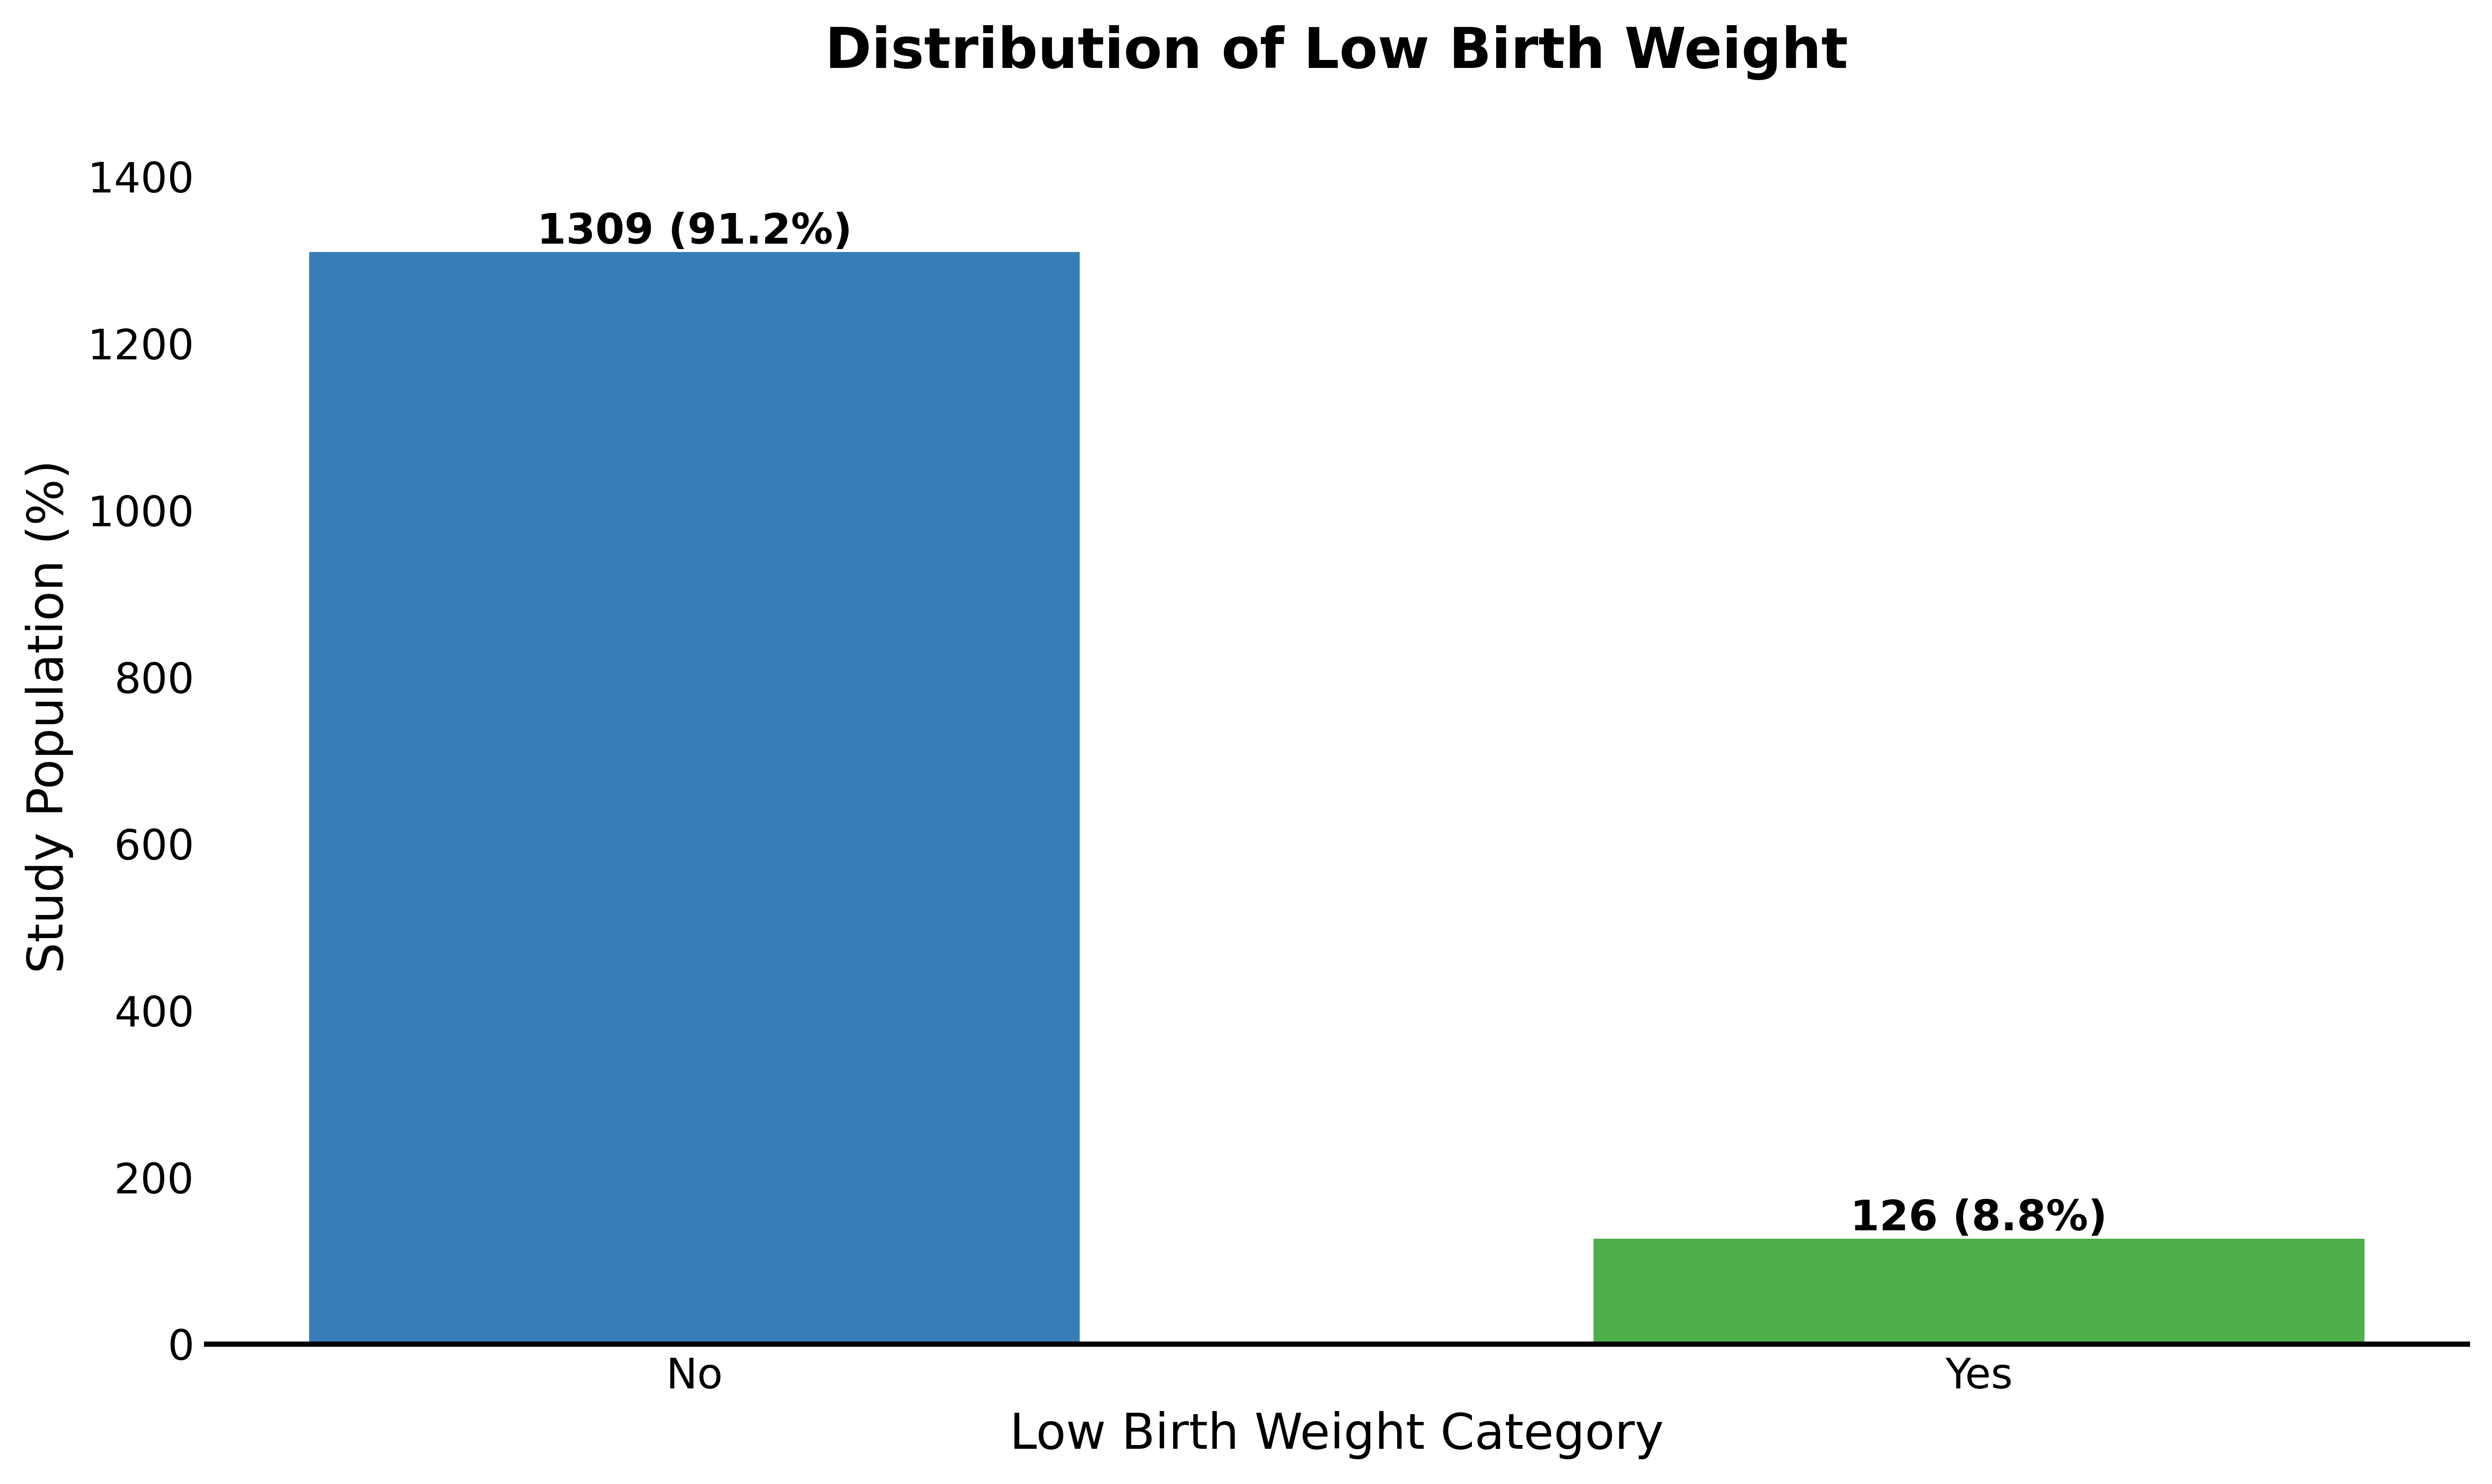

In [ ]:
import matplotlib.pyplot as plt

# Data
categories = ['No', 'Yes']
values = [1309, 126]
percentages = [91.2, 8.8]  # Percentages as numbers for easier manipulation

fig, ax = plt.subplots(figsize=(10, 6))

# Colors suitable for an accessible and aesthetically pleasing look
colors = ['#377eb8', '#4daf4a']

# Create bars
bars = ax.bar(categories, values, color=colors, width=0.6)

# Add text on top of the bars
for bar, percentage in zip(bars, percentages):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()} ({percentage}%)',
            ha='center', va='bottom', fontweight='bold', fontsize=12)

# Aesthetic customizations
ax.set_title('Distribution of Low Birth Weight', fontsize=16, fontweight='bold')
ax.set_xlabel('Low Birth Weight Category', fontsize=14)
ax.set_ylabel('Study Population (%)', fontsize=14)
ax.set_ylim(0, max(values) * 1.15)  # Adjust to avoid cutting off the text

# Remove unnecessary borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Set background to transparent
fig.patch.set_alpha(0)
ax.set_facecolor('none')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig('graph_improved.png', transparent=True)  # Save with transparent background
plt.show()

